In [2]:
import os

# Add Git path to the PATH environment variable
os.environ['PATH'] += os.pathsep + r"C:\Users\boughrio\AppData\Local\Programs\Git\cmd"

# Now try installing the package again
!pip install git+https://github.com/SarraBoughriou/codecarbon.git

  Cloning https://github.com/SarraBoughriou/codecarbon.git to c:\users\boughrio\appdata\local\temp\pip-req-build-jx07rt4_
  Resolved https://github.com/SarraBoughriou/codecarbon.git to commit 45394c0f5a663031a19ec4cb55066501331a396c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for codecarbon: filename=codecarbon-2.4.3rc1-py3-none-any.whl size=495838 sha256=c2247a49d2d95e803f7f6fe4fca8cabb217b469bfadb68c6b8c9dd4669cbce64
  Stored in directory: C:\Users\boughrio\AppData\Local\Temp\pip-ephem-wheel-cache-zjstsis9\wheels\3d\58\46\9d6e13c155b1f56e1faa65dfae76c9f991b3a1bd16e69f6881
Successfully built codecarbon
  Attempting uninstall: codecarbon
    Found existing installation: codecarbon 2.4.2
  

  Running command git clone --filter=blob:none --quiet https://github.com/SarraBoughriou/codecarbon.git 'C:\Users\boughrio\AppData\Local\Temp\pip-req-build-jx07rt4_'


In [3]:
!pip install opencv-python
!pip install tensorflow


[codecarbon WARNING @ 12:45:54] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 12:45:54] [setup] RAM Tracking...
[codecarbon INFO @ 12:45:54] [setup] GPU Tracking...
[codecarbon INFO @ 12:45:54] No GPU found.
[codecarbon INFO @ 12:45:54] [setup] CPU Tracking...
[codecarbon WARNING @ 12:45:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:45:58] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 12:45:58] >>> Tracker's metadata:
[codecarbon INFO @ 12:45:58]   Platform system: Windows-10-10.0.19045-SP0
[codecarbon INFO @ 12:45:58]   Python version: 3.11.7
[codecarbon INFO @ 12:45:58]   CodeCarbon version: 2.4.3rc1
[codecarbon INFO @ 12:45:58]   Available RAM : 15.690 GB
[codecarbon INFO @ 12:45:58]   CPU count: 12
[codecarbon INFO @ 12:45:58]   CPU model: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 12:45:58]   GPU count: None
[codecarbon INFO @ 12:45:58

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

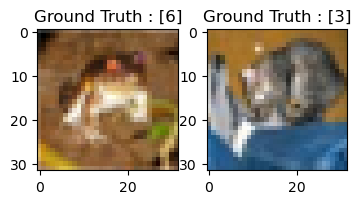

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from codecarbon import EmissionsTracker


trackerTot= EmissionsTracker()
trackerTot.start()

tracker= EmissionsTracker()
tracker.start()

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels)  = tf.keras.datasets.cifar10.load_data()

# Print shapes of training and testing data
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Display the first image in training and testing data
plt.figure(figsize=[4,2])
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))



Number of blurry images: 10


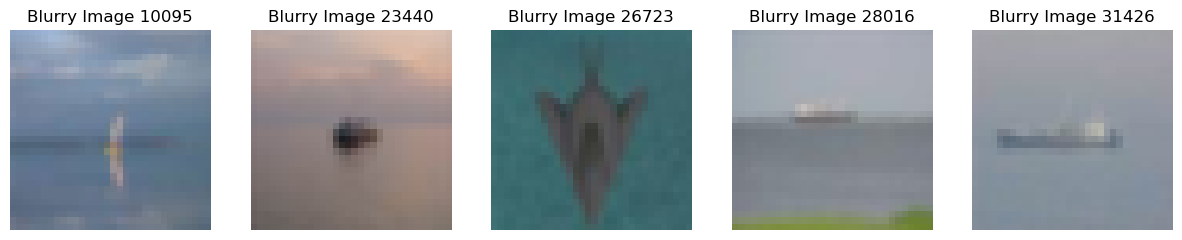

Shape of cleaned dataset: (49990, 32, 32, 3) (49990, 1)
Blurry images deleted.


In [5]:
import cv2
import matplotlib.pyplot as plt

# Function to check if an image is blurry
def is_blurry(image, threshold=100):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute the variance of Laplacian to determine blurriness
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    # Return True if the variance is below the threshold, indicating blur
    return variance < threshold

# Define a function to iterate through images and check for blur
def check_blur(images, threshold=100):
    blurry_images = []
    for i, image in enumerate(images):
        if is_blurry(image, threshold):
            blurry_images.append(i)
    return blurry_images


# Check for blurry images
blurry_indices = check_blur(train_images)

# Print the number of blurry images
print("Number of blurry images:", len(blurry_indices))

# Display the first five blurry images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(blurry_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[idx])
    plt.title(f"Blurry Image {idx}")
    plt.axis('off')
plt.show()

# Remove blurry images from the dataset using their indices
train_images = np.delete(train_images, blurry_indices, axis=0)
train_labels = np.delete(train_labels, blurry_indices, axis=0)

# Print the shape of the cleaned dataset
print("Shape of cleaned dataset:", train_images.shape, train_labels.shape)
print("Blurry images deleted.")



Number of black images: 1


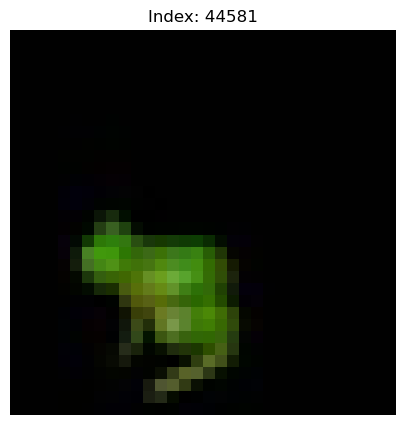

[codecarbon INFO @ 12:46:17] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:17] Energy consumed for all CPUs : 0.000135 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:17] 0.00016000242984434061 kWh of electricity used since the beginning.


Shape of cleaned dataset: (49989, 32, 32, 3) (49989, 1)
Black images deleted.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if an image is black
def is_black(image, threshold=10):
    # Compute the average pixel intensity
    avg_intensity = np.mean(image)
    # Return True if the average intensity is below the threshold, indicating a "black" image
    return avg_intensity < threshold

# Define a function to iterate through images and check for blackness
def check_black(images, threshold=10):
    black_indices = []
    for i, image in enumerate(images):
        if is_black(image, threshold):
            black_indices.append(i)
    return black_indices

# Function to display images with their indices
def display_images_with_indices(images, indices):
    plt.figure(figsize=(10, 5))
    num_images = len(indices)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Index: {idx}")
        plt.axis('off')
    plt.show()

# Check for black images
black_indices = check_black(train_images)

# Print the number of black images
print("Number of black images:", len(black_indices))

# Display the black images along with their indices
display_images_with_indices(train_images, black_indices)


# Remove blurry images from the dataset using their indices
train_images = np.delete(train_images, black_indices, axis=0)
train_labels = np.delete(train_labels, black_indices, axis=0)

# Print the shape of the cleaned dataset
print("Shape of cleaned dataset:", train_images.shape, train_labels.shape)
print("Black images deleted.")





In [7]:
# Reshape and preprocess the training and testing data
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

print("Shape of final dataset:", train_data.shape, train_labels.shape)


emissions: float = tracker.stop()
print(f"PreProcessing Emissions:{emissions} Kg")

[codecarbon INFO @ 12:46:18] Energy consumed for RAM : 0.000016 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:18] Energy consumed for all CPUs : 0.000087 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:18] 0.00010247280554280641 kWh of electricity used since the beginning.


Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Shape of final dataset: (49989, 32, 32, 3) (49989, 1)
PreProcessing Emissions:4.0473121726198594e-06 Kg


In [8]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = createModel()
batch_size = 256
epochs = 150

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

tracker= EmissionsTracker()
tracker.start()

history = model.fit(train_images, train_labels_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_images, test_labels_one_hot))

emissions: float = tracker.stop()
print(f"Training Emissions:{emissions} Kg")

C:\Users\boughrio\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[codecarbon WARNING @ 12:46:18] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 12:46:18] [setup] RAM Tracking...
[codecarbon INFO @ 12:46:18] [setup] GPU Tracking...
[codecarbon INFO @ 12:46:18] No GPU found.
[codecarbon INFO @ 12:46:18] [setup] CPU Tracking...
[codecarbon WARNING @ 12:46:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:46:22] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 12:46:22] >>> Tracker's metadata:
[codecarbon INFO @ 12:46:22]   Platform system: Windows-10-10.0.19045-SP0
[codecar

Epoch 1/150
  8/196 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - accuracy: 0.1148 - loss: 16.7228

[codecarbon INFO @ 12:46:32] Energy consumed for RAM : 0.000049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:32] Energy consumed for all CPUs : 0.000271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:32] 0.00032011480242258560 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.1072 - loss: 5.8493

[codecarbon INFO @ 12:46:40] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:40] Energy consumed for all CPUs : 0.000136 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:40] 0.00016014647338643618 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.1174 - loss: 4.6353

[codecarbon INFO @ 12:46:47] Energy consumed for RAM : 0.000074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:47] Energy consumed for all CPUs : 0.000406 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:47] 0.00048002574342470832 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.1319 - loss: 3.9157

[codecarbon INFO @ 12:46:55] Energy consumed for RAM : 0.000049 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:46:55] Energy consumed for all CPUs : 0.000271 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:46:55] 0.00032010360802473990 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.1418 - loss: 3.6087

[codecarbon INFO @ 12:47:02] Energy consumed for RAM : 0.000098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:02] Energy consumed for all CPUs : 0.000542 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:02] 0.00063999078939215093 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 169ms/step - accuracy: 0.1421 - loss: 3.6021 - val_accuracy: 0.3180 - val_loss: 1.8125
Epoch 2/150
 43/196 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.2794 - loss: 1.8455

[codecarbon INFO @ 12:47:10] Energy consumed for RAM : 0.000074 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:10] Energy consumed for all CPUs : 0.000407 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:10] 0.00048022309390859645 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.2931 - loss: 1.8263

[codecarbon INFO @ 12:47:17] Energy consumed for RAM : 0.000123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:17] Energy consumed for all CPUs : 0.000678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:17] 0.00080019021315903425 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.3079 - loss: 1.8013

[codecarbon INFO @ 12:47:25] Energy consumed for RAM : 0.000098 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:25] Energy consumed for all CPUs : 0.000542 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:25] 0.00064023822279990776 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.3171 - loss: 1.7836

[codecarbon INFO @ 12:47:32] Energy consumed for RAM : 0.000147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:32] Energy consumed for all CPUs : 0.000813 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:32] 0.00096033506796496144 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.3210 - loss: 1.7756 - val_accuracy: 0.4336 - val_loss: 1.5352
Epoch 3/150
 26/196 ━━━━━━━━━━━━━━━━━━━━ 25s 153ms/step - accuracy: 0.4289 - loss: 1.5574

[codecarbon INFO @ 12:47:40] Energy consumed for RAM : 0.000123 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:40] Energy consumed for all CPUs : 0.000678 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:40] 0.00080018188357082682 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 21s 163ms/step - accuracy: 0.4239 - loss: 1.5624

[codecarbon INFO @ 12:47:47] Energy consumed for RAM : 0.000172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:47] Energy consumed for all CPUs : 0.000949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:47] 0.00112035940308201918 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.4270 - loss: 1.5527

[codecarbon INFO @ 12:47:55] Energy consumed for RAM : 0.000147 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:47:55] Energy consumed for all CPUs : 0.000813 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:47:55] 0.00096014609360480082 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.4309 - loss: 1.5424

[codecarbon INFO @ 12:48:02] Energy consumed for RAM : 0.000196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:02] Energy consumed for all CPUs : 0.001084 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:02] 0.00128036687844835942 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.4342 - loss: 1.5339 - val_accuracy: 0.5205 - val_loss: 1.3607
Epoch 4/150
  9/196 ━━━━━━━━━━━━━━━━━━━━ 23s 127ms/step - accuracy: 0.5000 - loss: 1.4316

[codecarbon INFO @ 12:48:10] Energy consumed for RAM : 0.000172 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:10] Energy consumed for all CPUs : 0.000949 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:10] 0.00112021355519002818 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.4951 - loss: 1.4042

[codecarbon INFO @ 12:48:17] Energy consumed for RAM : 0.000221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:17] Energy consumed for all CPUs : 0.001220 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:17] 0.00144062584179019057 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.4937 - loss: 1.3978

[codecarbon INFO @ 12:48:25] Energy consumed for RAM : 0.000196 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:25] Energy consumed for all CPUs : 0.001084 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:25] 0.00128025847689649695 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.4957 - loss: 1.3913

[codecarbon INFO @ 12:48:32] Energy consumed for RAM : 0.000245 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:32] Energy consumed for all CPUs : 0.001355 kWh. Total CPU Power : 32.5 W


161/196 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.4958 - loss: 1.3911

[codecarbon INFO @ 12:48:32] 0.00160060497471518600 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.4979 - loss: 1.3852 - val_accuracy: 0.5641 - val_loss: 1.2119
Epoch 5/150
  6/196 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step - accuracy: 0.5248 - loss: 1.3339

[codecarbon INFO @ 12:48:40] Energy consumed for RAM : 0.000221 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:40] Energy consumed for all CPUs : 0.001220 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:40] 0.00144037059658904906 kWh of electricity used since the beginning.


 48/196 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step - accuracy: 0.5330 - loss: 1.2911

[codecarbon INFO @ 12:48:47] Energy consumed for RAM : 0.000270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:47] Energy consumed for all CPUs : 0.001491 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:47] 0.00176055980491736982 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.5362 - loss: 1.2788

[codecarbon INFO @ 12:48:55] Energy consumed for RAM : 0.000245 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:48:55] Energy consumed for all CPUs : 0.001355 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:48:55] 0.00160051631687941395 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.5385 - loss: 1.2719

[codecarbon INFO @ 12:49:02] Energy consumed for RAM : 0.000294 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:02] Energy consumed for all CPUs : 0.001626 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:02] 0.00192062470945644423 kWh of electricity used since the beginning.


189/196 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.5411 - loss: 1.2656

[codecarbon INFO @ 12:49:10] Energy consumed for RAM : 0.000270 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:10] Energy consumed for all CPUs : 0.001491 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:10] 0.00176075219694046630 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step - accuracy: 0.5415 - loss: 1.2647 - val_accuracy: 0.6044 - val_loss: 1.1073
Epoch 6/150
 24/196 ━━━━━━━━━━━━━━━━━━━━ 27s 158ms/step - accuracy: 0.5685 - loss: 1.2081

[codecarbon INFO @ 12:49:17] Energy consumed for RAM : 0.000319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:17] Energy consumed for all CPUs : 0.001762 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:17] 0.00208083816323718614 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.5755 - loss: 1.1887

[codecarbon INFO @ 12:49:25] Energy consumed for RAM : 0.000294 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:25] Energy consumed for all CPUs : 0.001626 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:25] 0.00192067742930962255 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 0.5772 - loss: 1.1833

[codecarbon INFO @ 12:49:32] Energy consumed for RAM : 0.000343 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:32] Energy consumed for all CPUs : 0.001897 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:32] 0.00224074076894453756 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.5783 - loss: 1.1792

[codecarbon INFO @ 12:49:40] Energy consumed for RAM : 0.000319 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:40] Energy consumed for all CPUs : 0.001762 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:40] 0.00208060626334110417 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.5790 - loss: 1.1773 - val_accuracy: 0.6032 - val_loss: 1.1334
Epoch 7/150
  6/196 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.6151 - loss: 1.0878

[codecarbon INFO @ 12:49:47] Energy consumed for RAM : 0.000368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:47] Energy consumed for all CPUs : 0.002033 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:49:47] 0.00240073977173559973 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.6080 - loss: 1.1085

[codecarbon INFO @ 12:49:55] Energy consumed for RAM : 0.000343 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:49:55] Energy consumed for all CPUs : 0.001897 kWh. Total CPU Power : 32.5 W


 58/196 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.6080 - loss: 1.1084

[codecarbon INFO @ 12:49:55] 0.00224057689410862544 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.6085 - loss: 1.1050

[codecarbon INFO @ 12:50:02] Energy consumed for RAM : 0.000392 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:02] Energy consumed for all CPUs : 0.002169 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:02] 0.00256114161606709476 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.6091 - loss: 1.1015

[codecarbon INFO @ 12:50:11] Energy consumed for RAM : 0.000368 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:11] Energy consumed for all CPUs : 0.002033 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:11] 0.00240066709103699911 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.6102 - loss: 1.0982

[codecarbon INFO @ 12:50:17] Energy consumed for RAM : 0.000417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:17] Energy consumed for all CPUs : 0.002304 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:17] 0.00272117781125188292 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.6102 - loss: 1.0981 - val_accuracy: 0.6484 - val_loss: 0.9996
Epoch 8/150
 42/196 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.6288 - loss: 1.0362

[codecarbon INFO @ 12:50:26] Energy consumed for RAM : 0.000392 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:26] Energy consumed for all CPUs : 0.002169 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:26] 0.00256096974299845634 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.6293 - loss: 1.0378

[codecarbon INFO @ 12:50:32] Energy consumed for RAM : 0.000441 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:32] Energy consumed for all CPUs : 0.002440 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:32] 0.00288135968658315578 kWh of electricity used since the beginning.


135/196 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.6298 - loss: 1.0392

[codecarbon INFO @ 12:50:41] Energy consumed for RAM : 0.000417 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:41] Energy consumed for all CPUs : 0.002304 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:41] 0.00272100259461522265 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.6308 - loss: 1.0385

[codecarbon INFO @ 12:50:47] Energy consumed for RAM : 0.000466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:47] Energy consumed for all CPUs : 0.002576 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:47] 0.00304153754461714823 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.6314 - loss: 1.0378 - val_accuracy: 0.6734 - val_loss: 0.9338
Epoch 9/150
 22/196 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.6354 - loss: 1.0193

[codecarbon INFO @ 12:50:56] Energy consumed for RAM : 0.000441 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:50:56] Energy consumed for all CPUs : 0.002440 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:50:56] 0.00288103190927571510 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.6386 - loss: 1.0165

[codecarbon INFO @ 12:51:02] Energy consumed for RAM : 0.000490 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:02] Energy consumed for all CPUs : 0.002711 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:02] 0.00320149825296214352 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.6426 - loss: 1.0081

[codecarbon INFO @ 12:51:11] Energy consumed for RAM : 0.000466 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:11] Energy consumed for all CPUs : 0.002575 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:11] 0.00304145588275861424 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.6442 - loss: 1.0043

[codecarbon INFO @ 12:51:17] Energy consumed for RAM : 0.000515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:17] Energy consumed for all CPUs : 0.002847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:17] 0.00336159261022571073 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.6455 - loss: 1.0016 - val_accuracy: 0.7005 - val_loss: 0.8678
Epoch 10/150
  1/196 ━━━━━━━━━━━━━━━━━━━━ 39s 203ms/step - accuracy: 0.6562 - loss: 1.0580

[codecarbon INFO @ 12:51:26] Energy consumed for RAM : 0.000491 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:26] Energy consumed for all CPUs : 0.002711 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:26] 0.00320182903800759512 kWh of electricity used since the beginning.


 41/196 ━━━━━━━━━━━━━━━━━━━━ 25s 165ms/step - accuracy: 0.6536 - loss: 0.9918

[codecarbon INFO @ 12:51:32] Energy consumed for RAM : 0.000540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:32] Energy consumed for all CPUs : 0.002982 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:32] 0.00352184157111584423 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.6602 - loss: 0.9679

[codecarbon INFO @ 12:51:41] Energy consumed for RAM : 0.000515 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:41] Energy consumed for all CPUs : 0.002847 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:41] 0.00336205472682796474 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.6633 - loss: 0.9591

[codecarbon INFO @ 12:51:47] Energy consumed for RAM : 0.000564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:47] Energy consumed for all CPUs : 0.003118 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:47] 0.00368233570450154490 kWh of electricity used since the beginning.


189/196 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.6657 - loss: 0.9533

[codecarbon INFO @ 12:51:56] Energy consumed for RAM : 0.000540 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:51:56] Energy consumed for all CPUs : 0.002983 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:51:56] 0.00352218159425631656 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.6660 - loss: 0.9525 - val_accuracy: 0.6993 - val_loss: 0.8529
Epoch 11/150
 22/196 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - accuracy: 0.6696 - loss: 0.9276

[codecarbon INFO @ 12:52:02] Energy consumed for RAM : 0.000589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:02] Energy consumed for all CPUs : 0.003254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:02] 0.00384220155105202948 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.6761 - loss: 0.9179

[codecarbon INFO @ 12:52:11] Energy consumed for RAM : 0.000564 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:11] Energy consumed for all CPUs : 0.003118 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:11] 0.00368248185305761417 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.6786 - loss: 0.9133

[codecarbon INFO @ 12:52:17] Energy consumed for RAM : 0.000613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:17] Energy consumed for all CPUs : 0.003389 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:17] 0.00400223249010308885 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.6809 - loss: 0.9092

[codecarbon INFO @ 12:52:26] Energy consumed for RAM : 0.000589 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:26] Energy consumed for all CPUs : 0.003254 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:26] 0.00384223810587369262 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.6815 - loss: 0.9079 - val_accuracy: 0.6911 - val_loss: 0.8920
Epoch 12/150
  5/196 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.6847 - loss: 0.9240

[codecarbon INFO @ 12:52:32] Energy consumed for RAM : 0.000638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:32] Energy consumed for all CPUs : 0.003525 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:32] 0.00416234109392098813 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.6914 - loss: 0.8912

[codecarbon INFO @ 12:52:41] Energy consumed for RAM : 0.000613 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:41] Energy consumed for all CPUs : 0.003389 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:41] 0.00400228877277158685 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.6919 - loss: 0.8867

[codecarbon INFO @ 12:52:47] Energy consumed for RAM : 0.000662 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:47] Energy consumed for all CPUs : 0.003660 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:47] 0.00432241495024840265 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.6928 - loss: 0.8823

[codecarbon INFO @ 12:52:56] Energy consumed for RAM : 0.000638 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:52:56] Energy consumed for all CPUs : 0.003525 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:52:56] 0.00416225201221894457 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.6933 - loss: 0.8805

[codecarbon INFO @ 12:53:02] Energy consumed for RAM : 0.000687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:02] Energy consumed for all CPUs : 0.003796 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:02] 0.00448242048281571794 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.6933 - loss: 0.8804 - val_accuracy: 0.7241 - val_loss: 0.7902
Epoch 13/150
 39/196 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.6971 - loss: 0.8600

[codecarbon INFO @ 12:53:11] Energy consumed for RAM : 0.000662 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:11] Energy consumed for all CPUs : 0.003660 kWh. Total CPU Power : 32.5 W


 40/196 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.6973 - loss: 0.8597

[codecarbon INFO @ 12:53:11] 0.00432254270474646818 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.7009 - loss: 0.8524

[codecarbon INFO @ 12:53:17] Energy consumed for RAM : 0.000711 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:17] Energy consumed for all CPUs : 0.003932 kWh. Total CPU Power : 32.5 W


 82/196 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.7009 - loss: 0.8523

[codecarbon INFO @ 12:53:17] 0.00464280147838493605 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.7025 - loss: 0.8500

[codecarbon INFO @ 12:53:26] Energy consumed for RAM : 0.000687 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:26] Energy consumed for all CPUs : 0.003796 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:26] 0.00448258819317537156 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.7039 - loss: 0.8478

[codecarbon INFO @ 12:53:32] Energy consumed for RAM : 0.000736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:32] Energy consumed for all CPUs : 0.004067 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:32] 0.00480312464681012605 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.7044 - loss: 0.8467 - val_accuracy: 0.7209 - val_loss: 0.7928
Epoch 14/150
 19/196 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - accuracy: 0.7030 - loss: 0.8501

[codecarbon INFO @ 12:53:41] Energy consumed for RAM : 0.000711 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:41] Energy consumed for all CPUs : 0.003931 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:41] 0.00464272099055281808 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.7076 - loss: 0.8374

[codecarbon INFO @ 12:53:47] Energy consumed for RAM : 0.000760 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:47] Energy consumed for all CPUs : 0.004203 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:47] 0.00496289779215594844 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 0.7094 - loss: 0.8332

[codecarbon INFO @ 12:53:56] Energy consumed for RAM : 0.000736 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:53:56] Energy consumed for all CPUs : 0.004067 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:53:56] 0.00480263134251914404 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.7103 - loss: 0.8309

[codecarbon INFO @ 12:54:02] Energy consumed for RAM : 0.000785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:02] Energy consumed for all CPUs : 0.004338 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:02] 0.00512278660479723556 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.7111 - loss: 0.8288 - val_accuracy: 0.7468 - val_loss: 0.7379
Epoch 15/150
  2/196 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - accuracy: 0.7578 - loss: 0.7533

[codecarbon INFO @ 12:54:11] Energy consumed for RAM : 0.000760 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:11] Energy consumed for all CPUs : 0.004202 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:11] 0.00496258394571460083 kWh of electricity used since the beginning.


 44/196 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - accuracy: 0.7394 - loss: 0.7606

[codecarbon INFO @ 12:54:17] Energy consumed for RAM : 0.000809 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:17] Energy consumed for all CPUs : 0.004474 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:17] 0.00528301558182197976 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.7372 - loss: 0.7639

[codecarbon INFO @ 12:54:26] Energy consumed for RAM : 0.000785 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:26] Energy consumed for all CPUs : 0.004338 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:26] 0.00512253985835284774 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.7356 - loss: 0.7670

[codecarbon INFO @ 12:54:32] Energy consumed for RAM : 0.000834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:32] Energy consumed for all CPUs : 0.004609 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:32] 0.00544298373426881262 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7338 - loss: 0.7715

[codecarbon INFO @ 12:54:41] Energy consumed for RAM : 0.000809 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:41] Energy consumed for all CPUs : 0.004473 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:41] 0.00528261635060913760 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.7337 - loss: 0.7719 - val_accuracy: 0.7498 - val_loss: 0.7366
Epoch 16/150
 26/196 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.7389 - loss: 0.7923

[codecarbon INFO @ 12:54:48] Energy consumed for RAM : 0.000858 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:48] Energy consumed for all CPUs : 0.004745 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:48] 0.00560325817353186494 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.7373 - loss: 0.7807

[codecarbon INFO @ 12:54:56] Energy consumed for RAM : 0.000834 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:54:56] Energy consumed for all CPUs : 0.004609 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:54:56] 0.00544254184645956863 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.7368 - loss: 0.7772

[codecarbon INFO @ 12:55:03] Energy consumed for RAM : 0.000883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:03] Energy consumed for all CPUs : 0.004880 kWh. Total CPU Power : 32.5 W


121/196 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.7368 - loss: 0.7772

[codecarbon INFO @ 12:55:03] 0.00576314553495100787 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.7364 - loss: 0.7751

[codecarbon INFO @ 12:55:11] Energy consumed for RAM : 0.000858 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:11] Energy consumed for all CPUs : 0.004744 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:11] 0.00560274144933057324 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.7362 - loss: 0.7747 - val_accuracy: 0.7532 - val_loss: 0.7149
Epoch 17/150


[codecarbon INFO @ 12:55:18] Energy consumed for RAM : 0.000907 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:18] Energy consumed for all CPUs : 0.005016 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:18] 0.00592321599092972273 kWh of electricity used since the beginning.


  8/196 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.7376 - loss: 0.7293

[codecarbon INFO @ 12:55:26] Energy consumed for RAM : 0.000883 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:26] Energy consumed for all CPUs : 0.004880 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:26] 0.00576320227724276286 kWh of electricity used since the beginning.


 48/196 ━━━━━━━━━━━━━━━━━━━━ 24s 165ms/step - accuracy: 0.7389 - loss: 0.7431

[codecarbon INFO @ 12:55:33] Energy consumed for RAM : 0.000932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:33] Energy consumed for all CPUs : 0.005151 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:33] 0.00608325710135897407 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.7382 - loss: 0.7522

[codecarbon INFO @ 12:55:41] Energy consumed for RAM : 0.000907 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:41] Energy consumed for all CPUs : 0.005016 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:41] 0.00592323797188596193 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.7379 - loss: 0.7536

[codecarbon INFO @ 12:55:48] Energy consumed for RAM : 0.000956 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:48] Energy consumed for all CPUs : 0.005287 kWh. Total CPU Power : 32.5 W


144/196 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.7379 - loss: 0.7537

[codecarbon INFO @ 12:55:48] 0.00624320033659400871 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7374 - loss: 0.7556

[codecarbon INFO @ 12:55:56] Energy consumed for RAM : 0.000932 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:55:56] Energy consumed for all CPUs : 0.005151 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:55:56] 0.00608319541698266238 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - accuracy: 0.7373 - loss: 0.7557 - val_accuracy: 0.7570 - val_loss: 0.7037
Epoch 18/150
 30/196 ━━━━━━━━━━━━━━━━━━━━ 26s 162ms/step - accuracy: 0.7534 - loss: 0.7165

[codecarbon INFO @ 12:56:03] Energy consumed for RAM : 0.000981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:03] Energy consumed for all CPUs : 0.005423 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:03] 0.00640347121754149089 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.7507 - loss: 0.7249

[codecarbon INFO @ 12:56:11] Energy consumed for RAM : 0.000956 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:11] Energy consumed for all CPUs : 0.005287 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:11] 0.00624335497590212604 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.7495 - loss: 0.7289

[codecarbon INFO @ 12:56:18] Energy consumed for RAM : 0.001005 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:18] Energy consumed for all CPUs : 0.005558 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:18] 0.00656316153937780075 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.7484 - loss: 0.7315

[codecarbon INFO @ 12:56:26] Energy consumed for RAM : 0.000981 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:26] Energy consumed for all CPUs : 0.005422 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:26] 0.00640334257887813924 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.7481 - loss: 0.7322 - val_accuracy: 0.7592 - val_loss: 0.6897
Epoch 19/150
 11/196 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.7578 - loss: 0.7128

[codecarbon INFO @ 12:56:33] Energy consumed for RAM : 0.001030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:33] Energy consumed for all CPUs : 0.005693 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:33] 0.00672331091335614736 kWh of electricity used since the beginning.


 65/196 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.7570 - loss: 0.7133

[codecarbon INFO @ 12:56:41] Energy consumed for RAM : 0.001006 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:41] Energy consumed for all CPUs : 0.005558 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:41] 0.00656338045654987663 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.7553 - loss: 0.7179

[codecarbon INFO @ 12:56:48] Energy consumed for RAM : 0.001054 kWh. RAM Power : 5.883667945861816 W


107/196 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.7553 - loss: 0.7179

[codecarbon INFO @ 12:56:48] Energy consumed for all CPUs : 0.005829 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:48] 0.00688308843171229253 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.7547 - loss: 0.7178

[codecarbon INFO @ 12:56:56] Energy consumed for RAM : 0.001030 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:56:56] Energy consumed for all CPUs : 0.005694 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:56:56] 0.00672359079955880869 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7540 - loss: 0.7187

[codecarbon INFO @ 12:57:03] Energy consumed for RAM : 0.001079 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:03] Energy consumed for all CPUs : 0.005964 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:03] 0.00704310767248694271 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.7540 - loss: 0.7187 - val_accuracy: 0.7559 - val_loss: 0.7130
Epoch 20/150
 47/196 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.7552 - loss: 0.7161

[codecarbon INFO @ 12:57:11] Energy consumed for RAM : 0.001055 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:11] Energy consumed for all CPUs : 0.005829 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:11] 0.00688342046236245682 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.7558 - loss: 0.7098

[codecarbon INFO @ 12:57:18] Energy consumed for RAM : 0.001103 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:18] Energy consumed for all CPUs : 0.006100 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:18] 0.00720319652263328759 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.7555 - loss: 0.7099

[codecarbon INFO @ 12:57:26] Energy consumed for RAM : 0.001079 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:26] Energy consumed for all CPUs : 0.005964 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:26] 0.00704345029558332489 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.7555 - loss: 0.7101

[codecarbon INFO @ 12:57:33] Energy consumed for RAM : 0.001128 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:33] Energy consumed for all CPUs : 0.006235 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:33] 0.00736344233267762893 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.7555 - loss: 0.7101 - val_accuracy: 0.7654 - val_loss: 0.6905
Epoch 21/150
 30/196 ━━━━━━━━━━━━━━━━━━━━ 26s 161ms/step - accuracy: 0.7513 - loss: 0.7007

[codecarbon INFO @ 12:57:41] Energy consumed for RAM : 0.001104 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:41] Energy consumed for all CPUs : 0.006100 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:41] 0.00720366695999190027 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - accuracy: 0.7549 - loss: 0.6959

[codecarbon INFO @ 12:57:48] Energy consumed for RAM : 0.001153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:48] Energy consumed for all CPUs : 0.006371 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:48] 0.00752340495474098595 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.7559 - loss: 0.6956

[codecarbon INFO @ 12:57:56] Energy consumed for RAM : 0.001128 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:57:56] Energy consumed for all CPUs : 0.006236 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:57:56] 0.00736366447606871637 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.7560 - loss: 0.6966

[codecarbon INFO @ 12:58:03] Energy consumed for RAM : 0.001177 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:03] Energy consumed for all CPUs : 0.006506 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:03] 0.00768325545125433332 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.7561 - loss: 0.6972 - val_accuracy: 0.7650 - val_loss: 0.6922
Epoch 22/150
 12/196 ━━━━━━━━━━━━━━━━━━━━ 29s 162ms/step - accuracy: 0.7638 - loss: 0.6931

[codecarbon INFO @ 12:58:11] Energy consumed for RAM : 0.001153 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:11] Energy consumed for all CPUs : 0.006371 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:11] 0.00752391039128064067 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.7571 - loss: 0.6999

[codecarbon INFO @ 12:58:18] Energy consumed for RAM : 0.001202 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:18] Energy consumed for all CPUs : 0.006642 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:18] 0.00784334226599587084 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.7564 - loss: 0.6993

[codecarbon INFO @ 12:58:26] Energy consumed for RAM : 0.001177 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:26] Energy consumed for all CPUs : 0.006507 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:26] 0.00768387724955753998 kWh of electricity used since the beginning.


149/196 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.7566 - loss: 0.6989

[codecarbon INFO @ 12:58:33] Energy consumed for RAM : 0.001226 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:33] Energy consumed for all CPUs : 0.006777 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:33] 0.00800339241939787907 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7568 - loss: 0.6980

[codecarbon INFO @ 12:58:41] Energy consumed for RAM : 0.001202 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:41] Energy consumed for all CPUs : 0.006642 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:41] 0.00784363261388650382 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.7568 - loss: 0.6980 - val_accuracy: 0.7568 - val_loss: 0.7050
Epoch 23/150
 36/196 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.7604 - loss: 0.6958

[codecarbon INFO @ 12:58:48] Energy consumed for RAM : 0.001251 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:48] Energy consumed for all CPUs : 0.006913 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:48] 0.00816351653994596034 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.7638 - loss: 0.6850

[codecarbon INFO @ 12:58:56] Energy consumed for RAM : 0.001226 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:58:56] Energy consumed for all CPUs : 0.006778 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:58:56] 0.00800385417523169149 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.7643 - loss: 0.6832

[codecarbon INFO @ 12:59:03] Energy consumed for RAM : 0.001275 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:03] Energy consumed for all CPUs : 0.007049 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:03] 0.00832365898920678533 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.7648 - loss: 0.6814

[codecarbon INFO @ 12:59:11] Energy consumed for RAM : 0.001251 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:11] Energy consumed for all CPUs : 0.006913 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:11] 0.00816406538592791969 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step - accuracy: 0.7647 - loss: 0.6812 - val_accuracy: 0.7761 - val_loss: 0.6608
Epoch 24/150
 11/196 ━━━━━━━━━━━━━━━━━━━━ 30s 164ms/step - accuracy: 0.7674 - loss: 0.6491

[codecarbon INFO @ 12:59:18] Energy consumed for RAM : 0.001300 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:18] Energy consumed for all CPUs : 0.007184 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:18] 0.00848362852788788618 kWh of electricity used since the beginning.


 72/196 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.7698 - loss: 0.6481

[codecarbon INFO @ 12:59:26] Energy consumed for RAM : 0.001275 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:26] Energy consumed for all CPUs : 0.007049 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:26] 0.00832394056464709139 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.7707 - loss: 0.6480

[codecarbon INFO @ 12:59:33] Energy consumed for RAM : 0.001324 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:33] Energy consumed for all CPUs : 0.007320 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:33] 0.00864376538351069139 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.7705 - loss: 0.6505

[codecarbon INFO @ 12:59:41] Energy consumed for RAM : 0.001300 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:41] Energy consumed for all CPUs : 0.007184 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:41] 0.00848412830385446466 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 163ms/step - accuracy: 0.7706 - loss: 0.6517 - val_accuracy: 0.7733 - val_loss: 0.6724
Epoch 25/150


[codecarbon INFO @ 12:59:48] Energy consumed for RAM : 0.001349 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:48] Energy consumed for all CPUs : 0.007455 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:48] 0.00880382582370901716 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.7744 - loss: 0.6365

[codecarbon INFO @ 12:59:56] Energy consumed for RAM : 0.001324 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 12:59:56] Energy consumed for all CPUs : 0.007320 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 12:59:56] 0.00864422896111619737 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.7741 - loss: 0.6407

[codecarbon INFO @ 13:00:03] Energy consumed for RAM : 0.001373 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:03] Energy consumed for all CPUs : 0.007591 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:03] 0.00896383277090565325 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.7732 - loss: 0.6459

[codecarbon INFO @ 13:00:11] Energy consumed for RAM : 0.001349 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:11] Energy consumed for all CPUs : 0.007455 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:11] 0.00880421920474381940 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.7733 - loss: 0.6468 - val_accuracy: 0.7563 - val_loss: 0.7236
Epoch 26/150
  2/196 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.7178 - loss: 0.7668

[codecarbon INFO @ 13:00:18] Energy consumed for RAM : 0.001398 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:18] Energy consumed for all CPUs : 0.007726 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:18] 0.00912390921561365142 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.7657 - loss: 0.6677

[codecarbon INFO @ 13:00:26] Energy consumed for RAM : 0.001373 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:26] Energy consumed for all CPUs : 0.007591 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:26] 0.00896432960858177877 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.7694 - loss: 0.6596

[codecarbon INFO @ 13:00:33] Energy consumed for RAM : 0.001422 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:33] Energy consumed for all CPUs : 0.007862 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:33] 0.00928413158540518021 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7711 - loss: 0.6550

[codecarbon INFO @ 13:00:41] Energy consumed for RAM : 0.001398 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:41] Energy consumed for all CPUs : 0.007726 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:41] 0.00912431192059796371 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.7712 - loss: 0.6549 - val_accuracy: 0.7791 - val_loss: 0.6573
Epoch 27/150
 28/196 ━━━━━━━━━━━━━━━━━━━━ 25s 153ms/step - accuracy: 0.7826 - loss: 0.6360

[codecarbon INFO @ 13:00:48] Energy consumed for RAM : 0.001447 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:48] Energy consumed for all CPUs : 0.007997 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:48] 0.00944422795586691982 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.7821 - loss: 0.6336

[codecarbon INFO @ 13:00:56] Energy consumed for RAM : 0.001422 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:00:56] Energy consumed for all CPUs : 0.007862 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:00:56] 0.00928433208930253343 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.7830 - loss: 0.6314

[codecarbon INFO @ 13:01:03] Energy consumed for RAM : 0.001471 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:03] Energy consumed for all CPUs : 0.008133 kWh. Total CPU Power : 32.5 W


143/196 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.7830 - loss: 0.6314

[codecarbon INFO @ 13:01:03] 0.00960450535284933585 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7823 - loss: 0.6333

[codecarbon INFO @ 13:01:11] Energy consumed for RAM : 0.001447 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:11] Energy consumed for all CPUs : 0.007998 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:11] 0.00944441239336370544 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 143ms/step - accuracy: 0.7822 - loss: 0.6333 - val_accuracy: 0.7732 - val_loss: 0.6614
Epoch 28/150
 48/196 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.7892 - loss: 0.6058

[codecarbon INFO @ 13:01:18] Energy consumed for RAM : 0.001496 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:18] Energy consumed for all CPUs : 0.008269 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:18] 0.00976456765050136982 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.7865 - loss: 0.6162

[codecarbon INFO @ 13:01:26] Energy consumed for RAM : 0.001471 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:26] Energy consumed for all CPUs : 0.008133 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:26] 0.00960473773065891913 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.7849 - loss: 0.6203

[codecarbon INFO @ 13:01:33] Energy consumed for RAM : 0.001520 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:33] Energy consumed for all CPUs : 0.008404 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:33] 0.00992471967276325161 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.7843 - loss: 0.6225 - val_accuracy: 0.7823 - val_loss: 0.6431
Epoch 29/150
 22/196 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.7965 - loss: 0.5884

[codecarbon INFO @ 13:01:41] Energy consumed for RAM : 0.001496 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:41] Energy consumed for all CPUs : 0.008269 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:41] 0.00976489637737606650 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.7920 - loss: 0.6043

[codecarbon INFO @ 13:01:48] Energy consumed for RAM : 0.001545 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:48] Energy consumed for all CPUs : 0.008540 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:48] 0.01008487183632393071 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.7896 - loss: 0.6091

[codecarbon INFO @ 13:01:56] Energy consumed for RAM : 0.001520 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:01:56] Energy consumed for all CPUs : 0.008404 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:01:56] 0.00992487271842721654 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7881 - loss: 0.6123

[codecarbon INFO @ 13:02:03] Energy consumed for RAM : 0.001569 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:03] Energy consumed for all CPUs : 0.008676 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:03] 0.01024505588452174348 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.7879 - loss: 0.6126 - val_accuracy: 0.7857 - val_loss: 0.6439
Epoch 30/150
 48/196 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.7879 - loss: 0.5978

[codecarbon INFO @ 13:02:11] Energy consumed for RAM : 0.001545 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:11] Energy consumed for all CPUs : 0.008540 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:11] 0.01008500324766571990 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.7869 - loss: 0.6062

[codecarbon INFO @ 13:02:18] Energy consumed for RAM : 0.001594 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:18] Energy consumed for all CPUs : 0.008811 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:18] 0.01040500320184148224 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.7868 - loss: 0.6092

[codecarbon INFO @ 13:02:26] Energy consumed for RAM : 0.001570 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:26] Energy consumed for all CPUs : 0.008675 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:26] 0.01024501708370639808 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.7869 - loss: 0.6099 - val_accuracy: 0.7931 - val_loss: 0.6150
Epoch 31/150
 13/196 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.7924 - loss: 0.6139

[codecarbon INFO @ 13:02:33] Energy consumed for RAM : 0.001619 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:33] Energy consumed for all CPUs : 0.008947 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:33] 0.01056500890778602937 kWh of electricity used since the beginning.


 77/196 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.7943 - loss: 0.6012

[codecarbon INFO @ 13:02:41] Energy consumed for RAM : 0.001594 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:41] Energy consumed for all CPUs : 0.008811 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:41] 0.01040507783537883597 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.7948 - loss: 0.6018

[codecarbon INFO @ 13:02:48] Energy consumed for RAM : 0.001643 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:48] Energy consumed for all CPUs : 0.009082 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:48] 0.01072501292795385343 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7938 - loss: 0.6055

[codecarbon INFO @ 13:02:56] Energy consumed for RAM : 0.001619 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:02:56] Energy consumed for all CPUs : 0.008946 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:02:56] 0.01056503981858110224 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.7938 - loss: 0.6056 - val_accuracy: 0.7879 - val_loss: 0.6192
Epoch 32/150
 42/196 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.7848 - loss: 0.6074

[codecarbon INFO @ 13:03:03] Energy consumed for RAM : 0.001668 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:03] Energy consumed for all CPUs : 0.009217 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:03] 0.01088501777649147385 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.7879 - loss: 0.6067

[codecarbon INFO @ 13:03:11] Energy consumed for RAM : 0.001643 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:12] Energy consumed for all CPUs : 0.009082 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:12] 0.01072530230068505057 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7884 - loss: 0.6073

[codecarbon INFO @ 13:03:18] Energy consumed for RAM : 0.001692 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:18] Energy consumed for all CPUs : 0.009353 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:18] 0.01104509797532230927 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.7886 - loss: 0.6074 - val_accuracy: 0.7957 - val_loss: 0.6105
Epoch 33/150
 20/196 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.7883 - loss: 0.6491

[codecarbon INFO @ 13:03:27] Energy consumed for RAM : 0.001668 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:27] Energy consumed for all CPUs : 0.009218 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:27] 0.01088529058159671929 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.7902 - loss: 0.6230

[codecarbon INFO @ 13:03:33] Energy consumed for RAM : 0.001717 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:33] Energy consumed for all CPUs : 0.009489 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:33] 0.01120554421114197674 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.7914 - loss: 0.6130

[codecarbon INFO @ 13:03:42] Energy consumed for RAM : 0.001692 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:42] Energy consumed for all CPUs : 0.009353 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:42] 0.01104541266378215522 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7914 - loss: 0.6115

[codecarbon INFO @ 13:03:48] Energy consumed for RAM : 0.001741 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:48] Energy consumed for all CPUs : 0.009624 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:48] 0.01136530878520257241 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.7914 - loss: 0.6111 - val_accuracy: 0.7827 - val_loss: 0.6313
Epoch 34/150
 48/196 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.7992 - loss: 0.5912

[codecarbon INFO @ 13:03:57] Energy consumed for RAM : 0.001717 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:03:57] Energy consumed for all CPUs : 0.009489 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:03:57] 0.01120550416653288452 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.7977 - loss: 0.5934

[codecarbon INFO @ 13:04:03] Energy consumed for RAM : 0.001766 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:03] Energy consumed for all CPUs : 0.009760 kWh. Total CPU Power : 32.5 W


 97/196 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.7976 - loss: 0.5934

[codecarbon INFO @ 13:04:03] 0.01152517892248411044 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.7971 - loss: 0.5938

[codecarbon INFO @ 13:04:12] Energy consumed for RAM : 0.001741 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:12] Energy consumed for all CPUs : 0.009624 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:12] 0.01136570809118540339 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.7970 - loss: 0.5936 - val_accuracy: 0.7981 - val_loss: 0.6113
Epoch 35/150
  7/196 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.7959 - loss: 0.5922

[codecarbon INFO @ 13:04:18] Energy consumed for RAM : 0.001790 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:18] Energy consumed for all CPUs : 0.009895 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:18] 0.01168542483260533865 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.7980 - loss: 0.5943

[codecarbon INFO @ 13:04:27] Energy consumed for RAM : 0.001766 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:27] Energy consumed for all CPUs : 0.009760 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:27] 0.01152583616072118747 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.7972 - loss: 0.5931

[codecarbon INFO @ 13:04:33] Energy consumed for RAM : 0.001815 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:33] Energy consumed for all CPUs : 0.010031 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:33] 0.01184532155664839645 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7964 - loss: 0.5927

[codecarbon INFO @ 13:04:42] Energy consumed for RAM : 0.001790 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:42] Energy consumed for all CPUs : 0.009896 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:42] 0.01168617312790442252 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.7964 - loss: 0.5926 - val_accuracy: 0.7818 - val_loss: 0.6475
Epoch 36/150
 34/196 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.7840 - loss: 0.6171

[codecarbon INFO @ 13:04:48] Energy consumed for RAM : 0.001839 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:48] Energy consumed for all CPUs : 0.010166 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:04:48] 0.01200549512313238941 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.7924 - loss: 0.6006

[codecarbon INFO @ 13:04:57] Energy consumed for RAM : 0.001815 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:04:57] Energy consumed for all CPUs : 0.010032 kWh. Total CPU Power : 32.5 W


103/196 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.7925 - loss: 0.6005

[codecarbon INFO @ 13:04:57] 0.01184637124607233749 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7942 - loss: 0.5962

[codecarbon INFO @ 13:05:03] Energy consumed for RAM : 0.001864 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:03] Energy consumed for all CPUs : 0.010302 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:03] 0.01216541943972188414 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.7946 - loss: 0.5951 - val_accuracy: 0.7831 - val_loss: 0.6444
Epoch 37/150
  9/196 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.7898 - loss: 0.6128

[codecarbon INFO @ 13:05:12] Energy consumed for RAM : 0.001839 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:12] Energy consumed for all CPUs : 0.010167 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:12] 0.01200639968642894413 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.7995 - loss: 0.5883

[codecarbon INFO @ 13:05:18] Energy consumed for RAM : 0.001888 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:18] Energy consumed for all CPUs : 0.010437 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:18] 0.01232555482955078469 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.8017 - loss: 0.5790

[codecarbon INFO @ 13:05:27] Energy consumed for RAM : 0.001864 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:27] Energy consumed for all CPUs : 0.010302 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:27] 0.01216631070166653873 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.8017 - loss: 0.5780

[codecarbon INFO @ 13:05:33] Energy consumed for RAM : 0.001913 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:33] Energy consumed for all CPUs : 0.010573 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:33] 0.01248542682806496121 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.8015 - loss: 0.5783 - val_accuracy: 0.7928 - val_loss: 0.6159
Epoch 38/150
 15/196 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.8078 - loss: 0.5783

[codecarbon INFO @ 13:05:42] Energy consumed for RAM : 0.001888 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:42] Energy consumed for all CPUs : 0.010438 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:42] 0.01232622272040737044 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.8076 - loss: 0.5719

[codecarbon INFO @ 13:05:48] Energy consumed for RAM : 0.001937 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:48] Energy consumed for all CPUs : 0.010708 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:48] 0.01264559351774151817 kWh of electricity used since the beginning.


128/196 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.8064 - loss: 0.5691

[codecarbon INFO @ 13:05:57] Energy consumed for RAM : 0.001913 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:05:57] Energy consumed for all CPUs : 0.010574 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:05:57] 0.01248651859688238060 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8053 - loss: 0.5701

[codecarbon INFO @ 13:06:03] Energy consumed for RAM : 0.001962 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:03] Energy consumed for all CPUs : 0.010844 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:03] 0.01280553450054277079 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8049 - loss: 0.5706 - val_accuracy: 0.7861 - val_loss: 0.6348
Epoch 39/150
 34/196 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.8156 - loss: 0.5525

[codecarbon INFO @ 13:06:12] Energy consumed for RAM : 0.001937 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:12] Energy consumed for all CPUs : 0.010709 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:12] 0.01264643813605408756 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.8094 - loss: 0.5624

[codecarbon INFO @ 13:06:18] Energy consumed for RAM : 0.001986 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:18] Energy consumed for all CPUs : 0.010979 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:18] 0.01296553630311273256 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8074 - loss: 0.5655

[codecarbon INFO @ 13:06:27] Energy consumed for RAM : 0.001962 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:27] Energy consumed for all CPUs : 0.010845 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:27] 0.01280649941612535883 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8068 - loss: 0.5660

[codecarbon INFO @ 13:06:33] Energy consumed for RAM : 0.002011 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:33] Energy consumed for all CPUs : 0.011115 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:33] 0.01312537554316520194 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.8068 - loss: 0.5660 - val_accuracy: 0.7896 - val_loss: 0.6200
Epoch 40/150
 62/196 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.8100 - loss: 0.5520

[codecarbon INFO @ 13:06:42] Energy consumed for RAM : 0.001986 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:42] Energy consumed for all CPUs : 0.010980 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:42] 0.01296683350326089876 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.8116 - loss: 0.5496

[codecarbon INFO @ 13:06:48] Energy consumed for RAM : 0.002035 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:48] Energy consumed for all CPUs : 0.011250 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:48] 0.01328555159210543547 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8114 - loss: 0.5510

[codecarbon INFO @ 13:06:57] Energy consumed for RAM : 0.002011 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:06:57] Energy consumed for all CPUs : 0.011116 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:06:57] 0.01312658832309620757 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.8112 - loss: 0.5520 - val_accuracy: 0.7933 - val_loss: 0.6115
Epoch 41/150
 26/196 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8165 - loss: 0.5502

[codecarbon INFO @ 13:07:03] Energy consumed for RAM : 0.002060 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:03] Energy consumed for all CPUs : 0.011386 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:03] 0.01344550787720192458 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8157 - loss: 0.5465

[codecarbon INFO @ 13:07:12] Energy consumed for RAM : 0.002035 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:12] Energy consumed for all CPUs : 0.011251 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:12] 0.01328663433192630444 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.8143 - loss: 0.5480

[codecarbon INFO @ 13:07:18] Energy consumed for RAM : 0.002084 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:18] Energy consumed for all CPUs : 0.011521 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:18] 0.01360558810658311218 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8133 - loss: 0.5497 - val_accuracy: 0.7990 - val_loss: 0.6011
Epoch 42/150
  3/196 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - accuracy: 0.8158 - loss: 0.5070

[codecarbon INFO @ 13:07:27] Energy consumed for RAM : 0.002060 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:27] Energy consumed for all CPUs : 0.011386 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:27] 0.01344636312168942006 kWh of electricity used since the beginning.


 54/196 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.8123 - loss: 0.5393

[codecarbon INFO @ 13:07:33] Energy consumed for RAM : 0.002109 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:33] Energy consumed for all CPUs : 0.011657 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:33] 0.01376561644319826069 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.8130 - loss: 0.5425

[codecarbon INFO @ 13:07:42] Energy consumed for RAM : 0.002085 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:42] Energy consumed for all CPUs : 0.011522 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:42] 0.01360650665373530632 kWh of electricity used since the beginning.


171/196 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8125 - loss: 0.5452

[codecarbon INFO @ 13:07:48] Energy consumed for RAM : 0.002133 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:48] Energy consumed for all CPUs : 0.011792 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:48] 0.01392578274980168541 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8121 - loss: 0.5469 - val_accuracy: 0.7997 - val_loss: 0.6024
Epoch 43/150
 33/196 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.8046 - loss: 0.5513

[codecarbon INFO @ 13:07:57] Energy consumed for RAM : 0.002109 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:07:57] Energy consumed for all CPUs : 0.011658 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:07:57] 0.01376654724495411479 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.8072 - loss: 0.5508

[codecarbon INFO @ 13:08:03] Energy consumed for RAM : 0.002158 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:03] Energy consumed for all CPUs : 0.011928 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:03] 0.01408574762030159744 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.8090 - loss: 0.5497

[codecarbon INFO @ 13:08:12] Energy consumed for RAM : 0.002134 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:12] Energy consumed for all CPUs : 0.011794 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:12] 0.01392716458954236167 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8092 - loss: 0.5505

[codecarbon INFO @ 13:08:18] Energy consumed for RAM : 0.002182 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:18] Energy consumed for all CPUs : 0.012063 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:18] 0.01424574515126973868 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8092 - loss: 0.5505 - val_accuracy: 0.7980 - val_loss: 0.6153
Epoch 44/150
 61/196 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.8068 - loss: 0.5603

[codecarbon INFO @ 13:08:27] Energy consumed for RAM : 0.002158 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:27] Energy consumed for all CPUs : 0.011929 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:27] 0.01408694726787192153 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.8074 - loss: 0.5572

[codecarbon INFO @ 13:08:33] Energy consumed for RAM : 0.002207 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:33] Energy consumed for all CPUs : 0.012199 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:33] 0.01440588981398817532 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8071 - loss: 0.5575

[codecarbon INFO @ 13:08:42] Energy consumed for RAM : 0.002183 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:42] Energy consumed for all CPUs : 0.012064 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:42] 0.01424695033048259223 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8072 - loss: 0.5573 - val_accuracy: 0.7891 - val_loss: 0.6286
Epoch 45/150
 18/196 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.8233 - loss: 0.5375

[codecarbon INFO @ 13:08:48] Energy consumed for RAM : 0.002231 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:48] Energy consumed for all CPUs : 0.012334 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:48] 0.01456590663575468847 kWh of electricity used since the beginning.


 87/196 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.8161 - loss: 0.5401

[codecarbon INFO @ 13:08:57] Energy consumed for RAM : 0.002207 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:08:57] Energy consumed for all CPUs : 0.012200 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:08:57] 0.01440706769759072907 kWh of electricity used since the beginning.


134/196 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.8141 - loss: 0.5447

[codecarbon INFO @ 13:09:03] Energy consumed for RAM : 0.002256 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:03] Energy consumed for all CPUs : 0.012470 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:03] 0.01472621948342244143 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8128 - loss: 0.5482

[codecarbon INFO @ 13:09:12] Energy consumed for RAM : 0.002232 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:12] Energy consumed for all CPUs : 0.012335 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:12] 0.01456691013012774080 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.8127 - loss: 0.5483 - val_accuracy: 0.7945 - val_loss: 0.6115
Epoch 46/150
 39/196 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.8048 - loss: 0.5738

[codecarbon INFO @ 13:09:18] Energy consumed for RAM : 0.002281 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:18] Energy consumed for all CPUs : 0.012606 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:18] 0.01488627530087583382 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.8104 - loss: 0.5594

[codecarbon INFO @ 13:09:27] Energy consumed for RAM : 0.002256 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:27] Energy consumed for all CPUs : 0.012471 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:27] 0.01472709235591837182 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.8109 - loss: 0.5571

[codecarbon INFO @ 13:09:33] Energy consumed for RAM : 0.002305 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:33] Energy consumed for all CPUs : 0.012741 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:33] 0.01504622417590637147 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 143ms/step - accuracy: 0.8109 - loss: 0.5560 - val_accuracy: 0.8039 - val_loss: 0.5974
Epoch 47/150
  7/196 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.8306 - loss: 0.4965

[codecarbon INFO @ 13:09:42] Energy consumed for RAM : 0.002281 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:42] Energy consumed for all CPUs : 0.012607 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:42] 0.01488722465502351905 kWh of electricity used since the beginning.


 59/196 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.8148 - loss: 0.5390

[codecarbon INFO @ 13:09:48] Energy consumed for RAM : 0.002330 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:48] Energy consumed for all CPUs : 0.012877 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:48] 0.01520631483998040323 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8147 - loss: 0.5383

[codecarbon INFO @ 13:09:57] Energy consumed for RAM : 0.002305 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:09:57] Energy consumed for all CPUs : 0.012742 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:09:57] 0.01504732389993616339 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8140 - loss: 0.5402

[codecarbon INFO @ 13:10:03] Energy consumed for RAM : 0.002354 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:03] Energy consumed for all CPUs : 0.013012 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:04] 0.01536642265373645844 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8138 - loss: 0.5405 - val_accuracy: 0.7966 - val_loss: 0.6095
Epoch 48/150
 33/196 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.8028 - loss: 0.5605

[codecarbon INFO @ 13:10:12] Energy consumed for RAM : 0.002330 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:12] Energy consumed for all CPUs : 0.012878 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:12] 0.01520725188144109521 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.8099 - loss: 0.5462

[codecarbon INFO @ 13:10:18] Energy consumed for RAM : 0.002379 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:18] Energy consumed for all CPUs : 0.013148 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:19] 0.01552624543317198541 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8123 - loss: 0.5434

[codecarbon INFO @ 13:10:27] Energy consumed for RAM : 0.002354 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:27] Energy consumed for all CPUs : 0.013013 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:27] 0.01536746102295229524 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8131 - loss: 0.5422

[codecarbon INFO @ 13:10:33] Energy consumed for RAM : 0.002403 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:34] Energy consumed for all CPUs : 0.013283 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:34] 0.01568618832509082947 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8131 - loss: 0.5421 - val_accuracy: 0.8008 - val_loss: 0.5980
Epoch 49/150
 57/196 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 0.8117 - loss: 0.5515

[codecarbon INFO @ 13:10:42] Energy consumed for RAM : 0.002379 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:42] Energy consumed for all CPUs : 0.013149 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:42] 0.01552753540773708744 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.8122 - loss: 0.5461

[codecarbon INFO @ 13:10:49] Energy consumed for RAM : 0.002428 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:49] Energy consumed for all CPUs : 0.013419 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:49] 0.01584633591097527050 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.8122 - loss: 0.5449

[codecarbon INFO @ 13:10:57] Energy consumed for RAM : 0.002403 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:10:57] Energy consumed for all CPUs : 0.013284 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:10:57] 0.01568737147927617634 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8123 - loss: 0.5444 - val_accuracy: 0.8026 - val_loss: 0.5839
Epoch 50/150
 15/196 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8349 - loss: 0.4942

[codecarbon INFO @ 13:11:04] Energy consumed for RAM : 0.002452 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:04] Energy consumed for all CPUs : 0.013554 kWh. Total CPU Power : 32.5 W


 16/196 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8341 - loss: 0.4959

[codecarbon INFO @ 13:11:04] 0.01600623146803186250 kWh of electricity used since the beginning.


 80/196 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.8204 - loss: 0.5250

[codecarbon INFO @ 13:11:12] Energy consumed for RAM : 0.002428 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:12] Energy consumed for all CPUs : 0.013420 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:12] 0.01584735826818283941 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8194 - loss: 0.5275

[codecarbon INFO @ 13:11:19] Energy consumed for RAM : 0.002477 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:19] Energy consumed for all CPUs : 0.013690 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:19] 0.01616651378352093257 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8189 - loss: 0.5286

[codecarbon INFO @ 13:11:27] Energy consumed for RAM : 0.002452 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:27] Energy consumed for all CPUs : 0.013555 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:27] 0.01600751784078571771 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8189 - loss: 0.5286 - val_accuracy: 0.7946 - val_loss: 0.6247
Epoch 51/150
 39/196 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.8249 - loss: 0.5256

[codecarbon INFO @ 13:11:34] Energy consumed for RAM : 0.002501 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:34] Energy consumed for all CPUs : 0.013825 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:34] 0.01632648307614866304 kWh of electricity used since the beginning.


108/196 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.8233 - loss: 0.5287

[codecarbon INFO @ 13:11:42] Energy consumed for RAM : 0.002477 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:42] Energy consumed for all CPUs : 0.013691 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:42] 0.01616751573654964802 kWh of electricity used since the beginning.


156/196 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.8227 - loss: 0.5290

[codecarbon INFO @ 13:11:49] Energy consumed for RAM : 0.002526 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:49] Energy consumed for all CPUs : 0.013961 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:49] 0.01648647934473119678 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.8222 - loss: 0.5296 - val_accuracy: 0.8044 - val_loss: 0.5871
Epoch 52/150
 19/196 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.8274 - loss: 0.5019

[codecarbon INFO @ 13:11:57] Energy consumed for RAM : 0.002501 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:11:57] Energy consumed for all CPUs : 0.013826 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:11:57] 0.01632769658448173650 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.8260 - loss: 0.5078

[codecarbon INFO @ 13:12:04] Energy consumed for RAM : 0.002550 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:04] Energy consumed for all CPUs : 0.014096 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:04] 0.01664665209053690920 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.8240 - loss: 0.5135

[codecarbon INFO @ 13:12:12] Energy consumed for RAM : 0.002526 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:12] Energy consumed for all CPUs : 0.013962 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:12] 0.01648779409578676400 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8226 - loss: 0.5172

[codecarbon INFO @ 13:12:19] Energy consumed for RAM : 0.002575 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:19] Energy consumed for all CPUs : 0.014232 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:19] 0.01680675714791558112 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8224 - loss: 0.5180 - val_accuracy: 0.7994 - val_loss: 0.6001
Epoch 53/150
 47/196 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.8087 - loss: 0.5522

[codecarbon INFO @ 13:12:27] Energy consumed for RAM : 0.002550 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:27] Energy consumed for all CPUs : 0.014098 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:27] 0.01664812241077094288 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8142 - loss: 0.5365

[codecarbon INFO @ 13:12:34] Energy consumed for RAM : 0.002599 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:34] Energy consumed for all CPUs : 0.014367 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:34] 0.01696674480061262369 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8180 - loss: 0.5263

[codecarbon INFO @ 13:12:42] Energy consumed for RAM : 0.002575 kWh. RAM Power : 5.883667945861816 W


165/196 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8180 - loss: 0.5262

[codecarbon INFO @ 13:12:42] Energy consumed for all CPUs : 0.014233 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:42] 0.01680798614910065589 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8187 - loss: 0.5245 - val_accuracy: 0.8089 - val_loss: 0.5741
Epoch 54/150
  6/196 ━━━━━━━━━━━━━━━━━━━━ 25s 135ms/step - accuracy: 0.8465 - loss: 0.4426

[codecarbon INFO @ 13:12:49] Energy consumed for RAM : 0.002624 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:49] Energy consumed for all CPUs : 0.014503 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:49] 0.01712671373850346845 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.8258 - loss: 0.4962

[codecarbon INFO @ 13:12:57] Energy consumed for RAM : 0.002599 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:12:57] Energy consumed for all CPUs : 0.014369 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:12:57] 0.01696804085759240702 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8246 - loss: 0.5012

[codecarbon INFO @ 13:13:04] Energy consumed for RAM : 0.002648 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:04] Energy consumed for all CPUs : 0.014638 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:04] 0.01728684205053813636 kWh of electricity used since the beginning.


192/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8236 - loss: 0.5064

[codecarbon INFO @ 13:13:12] Energy consumed for RAM : 0.002624 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:12] Energy consumed for all CPUs : 0.014504 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:12] 0.01712815566376249890 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8236 - loss: 0.5068 - val_accuracy: 0.7966 - val_loss: 0.5984
Epoch 55/150
 36/196 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8037 - loss: 0.5719

[codecarbon INFO @ 13:13:19] Energy consumed for RAM : 0.002673 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:19] Energy consumed for all CPUs : 0.014774 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:19] 0.01744732951807302299 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.8128 - loss: 0.5453

[codecarbon INFO @ 13:13:27] Energy consumed for RAM : 0.002649 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:27] Energy consumed for all CPUs : 0.014640 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:27] 0.01728821377437800982 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8152 - loss: 0.5380

[codecarbon INFO @ 13:13:34] Energy consumed for RAM : 0.002697 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:34] Energy consumed for all CPUs : 0.014910 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:34] 0.01760756071696008979 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8161 - loss: 0.5355 - val_accuracy: 0.8057 - val_loss: 0.5817
Epoch 56/150
 13/196 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.8355 - loss: 0.4748

[codecarbon INFO @ 13:13:42] Energy consumed for RAM : 0.002673 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:42] Energy consumed for all CPUs : 0.014775 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:42] 0.01744841360120361409 kWh of electricity used since the beginning.


 66/196 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.8291 - loss: 0.4958

[codecarbon INFO @ 13:13:49] Energy consumed for RAM : 0.002722 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:49] Energy consumed for all CPUs : 0.015046 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:49] 0.01776761912216396136 kWh of electricity used since the beginning.


130/196 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8283 - loss: 0.4999

[codecarbon INFO @ 13:13:57] Energy consumed for RAM : 0.002698 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:13:57] Energy consumed for all CPUs : 0.014911 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:13:57] 0.01760851920826460304 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8274 - loss: 0.5034

[codecarbon INFO @ 13:14:04] Energy consumed for RAM : 0.002747 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:04] Energy consumed for all CPUs : 0.015181 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:04] 0.01792767110937096980 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8271 - loss: 0.5043 - val_accuracy: 0.8006 - val_loss: 0.6119
Epoch 57/150
 40/196 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.8287 - loss: 0.5065

[codecarbon INFO @ 13:14:12] Energy consumed for RAM : 0.002722 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:12] Energy consumed for all CPUs : 0.015047 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:12] 0.01776876296770230415 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.8269 - loss: 0.5108

[codecarbon INFO @ 13:14:19] Energy consumed for RAM : 0.002771 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:19] Energy consumed for all CPUs : 0.015317 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:19] 0.01808792741288935829 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8256 - loss: 0.5131

[codecarbon INFO @ 13:14:27] Energy consumed for RAM : 0.002747 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:27] Energy consumed for all CPUs : 0.015182 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:27] 0.01792881962622919906 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8250 - loss: 0.5144 - val_accuracy: 0.7912 - val_loss: 0.6217
Epoch 58/150
  3/196 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.8158 - loss: 0.4951

[codecarbon INFO @ 13:14:34] Energy consumed for RAM : 0.002796 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:34] Energy consumed for all CPUs : 0.015452 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:34] 0.01824805291302208921 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.8271 - loss: 0.4997

[codecarbon INFO @ 13:14:42] Energy consumed for RAM : 0.002771 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:42] Energy consumed for all CPUs : 0.015318 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:42] 0.01808891733472650989 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8266 - loss: 0.5025

[codecarbon INFO @ 13:14:49] Energy consumed for RAM : 0.002820 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:49] Energy consumed for all CPUs : 0.015588 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:49] 0.01840808736594470862 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8263 - loss: 0.5042

[codecarbon INFO @ 13:14:57] Energy consumed for RAM : 0.002796 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:14:57] Energy consumed for all CPUs : 0.015453 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:14:57] 0.01824894893811144711 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8262 - loss: 0.5046 - val_accuracy: 0.7998 - val_loss: 0.5896
Epoch 59/150
 30/196 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8252 - loss: 0.5157

[codecarbon INFO @ 13:15:04] Energy consumed for RAM : 0.002845 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:04] Energy consumed for all CPUs : 0.015723 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:04] 0.01856804874432357172 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.8247 - loss: 0.5162

[codecarbon INFO @ 13:15:12] Energy consumed for RAM : 0.002820 kWh. RAM Power : 5.883667945861816 W


 96/196 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.8246 - loss: 0.5162

[codecarbon INFO @ 13:15:12] Energy consumed for all CPUs : 0.015589 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:12] 0.01840882811263269692 kWh of electricity used since the beginning.


147/196 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.8241 - loss: 0.5155

[codecarbon INFO @ 13:15:19] Energy consumed for RAM : 0.002869 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:19] Energy consumed for all CPUs : 0.015859 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:19] 0.01872811730577389477 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8238 - loss: 0.5156 - val_accuracy: 0.8046 - val_loss: 0.6103
Epoch 60/150
  7/196 ━━━━━━━━━━━━━━━━━━━━ 25s 133ms/step - accuracy: 0.8261 - loss: 0.4928

[codecarbon INFO @ 13:15:27] Energy consumed for RAM : 0.002845 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:27] Energy consumed for all CPUs : 0.015724 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:27] 0.01856894423542013173 kWh of electricity used since the beginning.


 58/196 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.8236 - loss: 0.5128

[codecarbon INFO @ 13:15:34] Energy consumed for RAM : 0.002894 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:34] Energy consumed for all CPUs : 0.015994 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:34] 0.01888817355460551198 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.8248 - loss: 0.5129

[codecarbon INFO @ 13:15:42] Energy consumed for RAM : 0.002869 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:42] Energy consumed for all CPUs : 0.015860 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:42] 0.01872877250699183163 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8252 - loss: 0.5132

[codecarbon INFO @ 13:15:49] Energy consumed for RAM : 0.002918 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:49] Energy consumed for all CPUs : 0.016130 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:49] 0.01904830237764227469 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8251 - loss: 0.5138 - val_accuracy: 0.8050 - val_loss: 0.5832
Epoch 61/150
 35/196 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.8312 - loss: 0.4823

[codecarbon INFO @ 13:15:57] Energy consumed for RAM : 0.002894 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:15:57] Energy consumed for all CPUs : 0.015995 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:15:57] 0.01888878908158975883 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.8310 - loss: 0.4865

[codecarbon INFO @ 13:16:04] Energy consumed for RAM : 0.002943 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:04] Energy consumed for all CPUs : 0.016265 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:04] 0.01920825985770122091 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.8313 - loss: 0.4873

[codecarbon INFO @ 13:16:12] Energy consumed for RAM : 0.002918 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:12] Energy consumed for all CPUs : 0.016131 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:12] 0.01904880287565903149 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8312 - loss: 0.4882

[codecarbon INFO @ 13:16:19] Energy consumed for RAM : 0.002967 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:19] Energy consumed for all CPUs : 0.016401 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:19] 0.01936821708548278759 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8312 - loss: 0.4883 - val_accuracy: 0.8052 - val_loss: 0.5847
Epoch 62/150
 62/196 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.8305 - loss: 0.4950

[codecarbon INFO @ 13:16:27] Energy consumed for RAM : 0.002943 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:27] Energy consumed for all CPUs : 0.016266 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:27] 0.01920905318136833378 kWh of electricity used since the beginning.


109/196 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.8315 - loss: 0.4924

[codecarbon INFO @ 13:16:34] Energy consumed for RAM : 0.002992 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:34] Energy consumed for all CPUs : 0.016536 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:34] 0.01952827178469826452 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8318 - loss: 0.4924

[codecarbon INFO @ 13:16:42] Energy consumed for RAM : 0.002967 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:42] Energy consumed for all CPUs : 0.016402 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:42] 0.01936894051813795037 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8317 - loss: 0.4926 - val_accuracy: 0.8034 - val_loss: 0.5754
Epoch 63/150
 20/196 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.8367 - loss: 0.4839

[codecarbon INFO @ 13:16:49] Energy consumed for RAM : 0.003016 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:49] Energy consumed for all CPUs : 0.016672 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:49] 0.01968835183784679518 kWh of electricity used since the beginning.


 90/196 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.8288 - loss: 0.5021

[codecarbon INFO @ 13:16:57] Energy consumed for RAM : 0.002992 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:16:57] Energy consumed for all CPUs : 0.016537 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:16:57] 0.01952892052523575242 kWh of electricity used since the beginning.


138/196 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.8273 - loss: 0.5054

[codecarbon INFO @ 13:17:04] Energy consumed for RAM : 0.003041 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:04] Energy consumed for all CPUs : 0.016807 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:04] 0.01984824617224241125 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8268 - loss: 0.5077

[codecarbon INFO @ 13:17:12] Energy consumed for RAM : 0.003016 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:12] Energy consumed for all CPUs : 0.016672 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:12] 0.01968885530865679620 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8268 - loss: 0.5077 - val_accuracy: 0.8169 - val_loss: 0.5723
Epoch 64/150
 49/196 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.8255 - loss: 0.4958

[codecarbon INFO @ 13:17:19] Energy consumed for RAM : 0.003065 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:19] Energy consumed for all CPUs : 0.016943 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:19] 0.02000831750618597277 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.8270 - loss: 0.4952

[codecarbon INFO @ 13:17:27] Energy consumed for RAM : 0.003041 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:27] Energy consumed for all CPUs : 0.016808 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:27] 0.01984892540421753435 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.8265 - loss: 0.4989

[codecarbon INFO @ 13:17:34] Energy consumed for RAM : 0.003090 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:34] Energy consumed for all CPUs : 0.017079 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:34] 0.02016844462827472109 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8263 - loss: 0.5007 - val_accuracy: 0.8041 - val_loss: 0.5890
Epoch 65/150
 23/196 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.8380 - loss: 0.4745

[codecarbon INFO @ 13:17:42] Energy consumed for RAM : 0.003065 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:42] Energy consumed for all CPUs : 0.016943 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:42] 0.02000882320504786954 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.8317 - loss: 0.4894

[codecarbon INFO @ 13:17:49] Energy consumed for RAM : 0.003114 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:49] Energy consumed for all CPUs : 0.017214 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:49] 0.02032863216897776507 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.8306 - loss: 0.4909

[codecarbon INFO @ 13:17:57] Energy consumed for RAM : 0.003090 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:17:57] Energy consumed for all CPUs : 0.017079 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:17:57] 0.02016878088848532424 kWh of electricity used since the beginning.


192/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8301 - loss: 0.4921

[codecarbon INFO @ 13:18:04] Energy consumed for RAM : 0.003139 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:04] Energy consumed for all CPUs : 0.017350 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:04] 0.02048879358403516218 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8300 - loss: 0.4922 - val_accuracy: 0.8119 - val_loss: 0.5699
Epoch 66/150
 50/196 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.8358 - loss: 0.4792

[codecarbon INFO @ 13:18:13] Energy consumed for RAM : 0.003114 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:13] Energy consumed for all CPUs : 0.017214 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:13] 0.02032876506337595243 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.8354 - loss: 0.4809

[codecarbon INFO @ 13:18:19] Energy consumed for RAM : 0.003163 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:19] Energy consumed for all CPUs : 0.017486 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:19] 0.02064907504077036562 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.8349 - loss: 0.4811

[codecarbon INFO @ 13:18:28] Energy consumed for RAM : 0.003139 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:28] Energy consumed for all CPUs : 0.017350 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:28] 0.02048880833575688135 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8344 - loss: 0.4820 - val_accuracy: 0.7956 - val_loss: 0.6352
Epoch 67/150
 13/196 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.7997 - loss: 0.5721

[codecarbon INFO @ 13:18:34] Energy consumed for RAM : 0.003188 kWh. RAM Power : 5.883667945861816 W


 14/196 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8004 - loss: 0.5706

[codecarbon INFO @ 13:18:34] Energy consumed for all CPUs : 0.017621 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:34] 0.02080902631355965871 kWh of electricity used since the beginning.


 77/196 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.8158 - loss: 0.5298

[codecarbon INFO @ 13:18:43] Energy consumed for RAM : 0.003163 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:43] Energy consumed for all CPUs : 0.017485 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:43] 0.02064890227593798103 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8204 - loss: 0.5191

[codecarbon INFO @ 13:18:49] Energy consumed for RAM : 0.003213 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:49] Energy consumed for all CPUs : 0.017757 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:49] 0.02096908493092265041 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8237 - loss: 0.5112

[codecarbon INFO @ 13:18:58] Energy consumed for RAM : 0.003188 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:18:58] Energy consumed for all CPUs : 0.017621 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:18:58] 0.02080892701680359808 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8238 - loss: 0.5109 - val_accuracy: 0.8043 - val_loss: 0.5852
Epoch 68/150
 41/196 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.8335 - loss: 0.4838

[codecarbon INFO @ 13:19:04] Energy consumed for RAM : 0.003237 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:04] Energy consumed for all CPUs : 0.017892 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:04] 0.02112907942397449987 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.8311 - loss: 0.4970

[codecarbon INFO @ 13:19:13] Energy consumed for RAM : 0.003213 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:13] Energy consumed for all CPUs : 0.017757 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:13] 0.02096915463580281691 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8311 - loss: 0.4981

[codecarbon INFO @ 13:19:19] Energy consumed for RAM : 0.003262 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:19] Energy consumed for all CPUs : 0.018028 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:19] 0.02128921303941298804 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.8309 - loss: 0.4990 - val_accuracy: 0.8069 - val_loss: 0.5929
Epoch 69/150
 17/196 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.8281 - loss: 0.5117

[codecarbon INFO @ 13:19:28] Energy consumed for RAM : 0.003237 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:28] Energy consumed for all CPUs : 0.017892 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:28] 0.02112916965151296830 kWh of electricity used since the beginning.


 68/196 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.8317 - loss: 0.5008

[codecarbon INFO @ 13:19:34] Energy consumed for RAM : 0.003286 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:34] Energy consumed for all CPUs : 0.018163 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:34] 0.02144933683766187676 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8320 - loss: 0.4979

[codecarbon INFO @ 13:19:43] Energy consumed for RAM : 0.003262 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:43] Energy consumed for all CPUs : 0.018028 kWh. Total CPU Power : 32.5 W


132/196 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8320 - loss: 0.4979

[codecarbon INFO @ 13:19:43] 0.02128931494774512212 kWh of electricity used since the beginning.


180/196 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.8320 - loss: 0.4972

[codecarbon INFO @ 13:19:49] Energy consumed for RAM : 0.003311 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:49] Energy consumed for all CPUs : 0.018299 kWh. Total CPU Power : 32.5 W


181/196 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.8320 - loss: 0.4972

[codecarbon INFO @ 13:19:49] 0.02160953815330762112 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8320 - loss: 0.4969 - val_accuracy: 0.8053 - val_loss: 0.5943
Epoch 70/150
 42/196 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.8428 - loss: 0.4726

[codecarbon INFO @ 13:19:58] Energy consumed for RAM : 0.003286 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:19:58] Energy consumed for all CPUs : 0.018163 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:19:58] 0.02144923489657289337 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8393 - loss: 0.4761

[codecarbon INFO @ 13:20:04] Energy consumed for RAM : 0.003335 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:04] Energy consumed for all CPUs : 0.018434 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:04] 0.02176964222618088182 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8368 - loss: 0.4806

[codecarbon INFO @ 13:20:13] Energy consumed for RAM : 0.003311 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:13] Energy consumed for all CPUs : 0.018299 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:13] 0.02160941941198602986 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8360 - loss: 0.4815 - val_accuracy: 0.8090 - val_loss: 0.5763
Epoch 71/150
  1/196 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - accuracy: 0.8398 - loss: 0.4632

[codecarbon INFO @ 13:20:19] Energy consumed for RAM : 0.003360 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:19] Energy consumed for all CPUs : 0.018570 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:19] 0.02192965977090747740 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.8369 - loss: 0.4788

[codecarbon INFO @ 13:20:28] Energy consumed for RAM : 0.003335 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:28] Energy consumed for all CPUs : 0.018434 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:28] 0.02176931731898871028 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.8362 - loss: 0.4776

[codecarbon INFO @ 13:20:34] Energy consumed for RAM : 0.003384 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:34] Energy consumed for all CPUs : 0.018706 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:34] 0.02208987041605751586 kWh of electricity used since the beginning.


187/196 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8354 - loss: 0.4788

[codecarbon INFO @ 13:20:43] Energy consumed for RAM : 0.003360 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:43] Energy consumed for all CPUs : 0.018570 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:43] 0.02192928663043196627 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.8352 - loss: 0.4792 - val_accuracy: 0.8166 - val_loss: 0.5653
Epoch 72/150
 28/196 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.8413 - loss: 0.4843

[codecarbon INFO @ 13:20:49] Energy consumed for RAM : 0.003409 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:49] Energy consumed for all CPUs : 0.018841 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:49] 0.02224982950780912336 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.8368 - loss: 0.4885

[codecarbon INFO @ 13:20:58] Energy consumed for RAM : 0.003384 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:20:58] Energy consumed for all CPUs : 0.018705 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:20:58] 0.02208948139973712296 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.8360 - loss: 0.4887

[codecarbon INFO @ 13:21:04] Energy consumed for RAM : 0.003433 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:04] Energy consumed for all CPUs : 0.018977 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:04] 0.02240986317737220235 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8355 - loss: 0.4883 - val_accuracy: 0.8045 - val_loss: 0.6049
Epoch 73/150
  5/196 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.8449 - loss: 0.4711

[codecarbon INFO @ 13:21:13] Energy consumed for RAM : 0.003409 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:13] Energy consumed for all CPUs : 0.018841 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:13] 0.02224966842260139160 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.8311 - loss: 0.5073

[codecarbon INFO @ 13:21:19] Energy consumed for RAM : 0.003458 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:19] Energy consumed for all CPUs : 0.019112 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:19] 0.02256995439283059415 kWh of electricity used since the beginning.


122/196 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8314 - loss: 0.5034

[codecarbon INFO @ 13:21:28] Energy consumed for RAM : 0.003433 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:28] Energy consumed for all CPUs : 0.018976 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:28] 0.02240964043550217402 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8315 - loss: 0.5010

[codecarbon INFO @ 13:21:34] Energy consumed for RAM : 0.003482 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:34] Energy consumed for all CPUs : 0.019248 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:34] 0.02273002091003012426 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8316 - loss: 0.5002 - val_accuracy: 0.8110 - val_loss: 0.5856
Epoch 74/150
 32/196 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.8435 - loss: 0.4545

[codecarbon INFO @ 13:21:43] Energy consumed for RAM : 0.003458 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:43] Energy consumed for all CPUs : 0.019112 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:43] 0.02256957419715716409 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.8420 - loss: 0.4617

[codecarbon INFO @ 13:21:49] Energy consumed for RAM : 0.003507 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:49] Energy consumed for all CPUs : 0.019383 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:49] 0.02289023680230193800 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.8413 - loss: 0.4648

[codecarbon INFO @ 13:21:58] Energy consumed for RAM : 0.003482 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:21:58] Energy consumed for all CPUs : 0.019248 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:21:58] 0.02272991310086640987 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8407 - loss: 0.4669

[codecarbon INFO @ 13:22:04] Energy consumed for RAM : 0.003531 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:04] Energy consumed for all CPUs : 0.019519 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:04] 0.02305017957045928101 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.8407 - loss: 0.4670 - val_accuracy: 0.8051 - val_loss: 0.5834
Epoch 75/150
 59/196 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.8361 - loss: 0.4808

[codecarbon INFO @ 13:22:13] Energy consumed for RAM : 0.003507 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:13] Energy consumed for all CPUs : 0.019383 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:13] 0.02288966453996094802 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.8357 - loss: 0.4811

[codecarbon INFO @ 13:22:19] Energy consumed for RAM : 0.003556 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:19] Energy consumed for all CPUs : 0.019654 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:19] 0.02321030067024992816 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.8355 - loss: 0.4825

[codecarbon INFO @ 13:22:28] Energy consumed for RAM : 0.003531 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:28] Energy consumed for all CPUs : 0.019518 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:28] 0.02304967968915342183 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8355 - loss: 0.4827 - val_accuracy: 0.8078 - val_loss: 0.5882
Epoch 76/150
 20/196 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.8286 - loss: 0.4982

[codecarbon INFO @ 13:22:34] Energy consumed for RAM : 0.003580 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:34] Energy consumed for all CPUs : 0.019790 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:34] 0.02337016559929796025 kWh of electricity used since the beginning.


 83/196 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.8303 - loss: 0.4929

[codecarbon INFO @ 13:22:43] Energy consumed for RAM : 0.003556 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:43] Energy consumed for all CPUs : 0.019654 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:43] 0.02320989647654637597 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.8312 - loss: 0.4891

[codecarbon INFO @ 13:22:49] Energy consumed for RAM : 0.003605 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:49] Energy consumed for all CPUs : 0.019925 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:49] 0.02353015551815619555 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8322 - loss: 0.4861

[codecarbon INFO @ 13:22:58] Energy consumed for RAM : 0.003580 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:22:58] Energy consumed for all CPUs : 0.019790 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:22:58] 0.02336985285951941396 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8322 - loss: 0.4861 - val_accuracy: 0.8008 - val_loss: 0.6152
Epoch 77/150
 47/196 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.8451 - loss: 0.4588

[codecarbon INFO @ 13:23:04] Energy consumed for RAM : 0.003629 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:04] Energy consumed for all CPUs : 0.020061 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:04] 0.02369018412788445951 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.8403 - loss: 0.4722

[codecarbon INFO @ 13:23:13] Energy consumed for RAM : 0.003605 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:13] Energy consumed for all CPUs : 0.019925 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:13] 0.02352997256616647451 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8391 - loss: 0.4749

[codecarbon INFO @ 13:23:19] Energy consumed for RAM : 0.003654 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:19] Energy consumed for all CPUs : 0.020196 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:19] 0.02385028962775265216 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.8386 - loss: 0.4760 - val_accuracy: 0.8075 - val_loss: 0.5896
Epoch 78/150
 21/196 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.8432 - loss: 0.4636

[codecarbon INFO @ 13:23:28] Energy consumed for RAM : 0.003629 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:28] Energy consumed for all CPUs : 0.020061 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:28] 0.02369000910220055503 kWh of electricity used since the beginning.


 71/196 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.8405 - loss: 0.4658

[codecarbon INFO @ 13:23:34] Energy consumed for RAM : 0.003679 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:34] Energy consumed for all CPUs : 0.020332 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:34] 0.02401037760995456197 kWh of electricity used since the beginning.


136/196 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.8389 - loss: 0.4693

[codecarbon INFO @ 13:23:43] Energy consumed for RAM : 0.003654 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:43] Energy consumed for all CPUs : 0.020196 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:43] 0.02385000309973135321 kWh of electricity used since the beginning.


186/196 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8383 - loss: 0.4711

[codecarbon INFO @ 13:23:49] Energy consumed for RAM : 0.003703 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:49] Energy consumed for all CPUs : 0.020467 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:49] 0.02417052030072137925 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.8383 - loss: 0.4713 - val_accuracy: 0.8103 - val_loss: 0.5806
Epoch 79/150
 47/196 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.8405 - loss: 0.4595

[codecarbon INFO @ 13:23:58] Energy consumed for RAM : 0.003678 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:23:58] Energy consumed for all CPUs : 0.020332 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:23:58] 0.02401026073883367681 kWh of electricity used since the beginning.


 97/196 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8428 - loss: 0.4594

[codecarbon INFO @ 13:24:04] Energy consumed for RAM : 0.003728 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:04] Energy consumed for all CPUs : 0.020603 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:04] 0.02433059011372743288 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8425 - loss: 0.4633

[codecarbon INFO @ 13:24:13] Energy consumed for RAM : 0.003703 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:13] Energy consumed for all CPUs : 0.020467 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:13] 0.02417026782630714993 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8423 - loss: 0.4646 - val_accuracy: 0.8089 - val_loss: 0.5896
Epoch 80/150
  7/196 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.8469 - loss: 0.4384

[codecarbon INFO @ 13:24:19] Energy consumed for RAM : 0.003752 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:19] Energy consumed for all CPUs : 0.020739 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:19] 0.02449066994831084268 kWh of electricity used since the beginning.


 76/196 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.8481 - loss: 0.4458

[codecarbon INFO @ 13:24:28] Energy consumed for RAM : 0.003727 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:28] Energy consumed for all CPUs : 0.020603 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:28] 0.02433011732302392885 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8471 - loss: 0.4505

[codecarbon INFO @ 13:24:34] Energy consumed for RAM : 0.003777 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:34] Energy consumed for all CPUs : 0.020874 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:34] 0.02465087708066931310 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8461 - loss: 0.4547

[codecarbon INFO @ 13:24:43] Energy consumed for RAM : 0.003752 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:43] Energy consumed for all CPUs : 0.020738 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:43] 0.02449016858681184183 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.8461 - loss: 0.4551 - val_accuracy: 0.8054 - val_loss: 0.6039
Epoch 81/150
 35/196 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.8314 - loss: 0.4873

[codecarbon INFO @ 13:24:49] Energy consumed for RAM : 0.003801 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:50] Energy consumed for all CPUs : 0.021010 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:50] 0.02481087401402295653 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.8326 - loss: 0.4879

[codecarbon INFO @ 13:24:58] Energy consumed for RAM : 0.003777 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:24:58] Energy consumed for all CPUs : 0.020874 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:24:58] 0.02465039876907331937 kWh of electricity used since the beginning.


153/196 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8334 - loss: 0.4863

[codecarbon INFO @ 13:25:05] Energy consumed for RAM : 0.003826 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:05] Energy consumed for all CPUs : 0.021145 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:05] 0.02497094122872757505 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8338 - loss: 0.4853 - val_accuracy: 0.8136 - val_loss: 0.5713
Epoch 82/150
 13/196 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8579 - loss: 0.4341

[codecarbon INFO @ 13:25:13] Energy consumed for RAM : 0.003801 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:13] Energy consumed for all CPUs : 0.021009 kWh. Total CPU Power : 32.5 W


 14/196 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8570 - loss: 0.4366

[codecarbon INFO @ 13:25:13] 0.02481012465958313748 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.8416 - loss: 0.4705

[codecarbon INFO @ 13:25:20] Energy consumed for RAM : 0.003850 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:20] Energy consumed for all CPUs : 0.021281 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:20] 0.02513088263030395508 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8409 - loss: 0.4717

[codecarbon INFO @ 13:25:28] Energy consumed for RAM : 0.003826 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:28] Energy consumed for all CPUs : 0.021145 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:28] 0.02497021455231530213 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.8404 - loss: 0.4739

[codecarbon INFO @ 13:25:35] Energy consumed for RAM : 0.003875 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:35] Energy consumed for all CPUs : 0.021416 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:35] 0.02529121322745407630 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8403 - loss: 0.4743 - val_accuracy: 0.8071 - val_loss: 0.5814
Epoch 83/150
 41/196 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.8352 - loss: 0.4836

[codecarbon INFO @ 13:25:43] Energy consumed for RAM : 0.003850 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:43] Energy consumed for all CPUs : 0.021280 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:43] 0.02513025165371471012 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.8367 - loss: 0.4800

[codecarbon INFO @ 13:25:50] Energy consumed for RAM : 0.003899 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:50] Energy consumed for all CPUs : 0.021552 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:50] 0.02545147369181572153 kWh of electricity used since the beginning.


155/196 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8376 - loss: 0.4769

[codecarbon INFO @ 13:25:58] Energy consumed for RAM : 0.003875 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:25:58] Energy consumed for all CPUs : 0.021416 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:25:58] 0.02529040277990219493 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.8379 - loss: 0.4756 - val_accuracy: 0.8175 - val_loss: 0.5685
Epoch 84/150
  1/196 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.8633 - loss: 0.4210

[codecarbon INFO @ 13:26:05] Energy consumed for RAM : 0.003924 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:05] Energy consumed for all CPUs : 0.021688 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:05] 0.02561146716631393372 kWh of electricity used since the beginning.


 64/196 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.8464 - loss: 0.4520

[codecarbon INFO @ 13:26:13] Energy consumed for RAM : 0.003899 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:13] Energy consumed for all CPUs : 0.021551 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:13] 0.02545040085437911756 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.8446 - loss: 0.4567

[codecarbon INFO @ 13:26:20] Energy consumed for RAM : 0.003948 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:20] Energy consumed for all CPUs : 0.021823 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:20] 0.02577167885331511574 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8433 - loss: 0.4603

[codecarbon INFO @ 13:26:28] Energy consumed for RAM : 0.003924 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:28] Energy consumed for all CPUs : 0.021687 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:28] 0.02561050524231004571 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8431 - loss: 0.4611 - val_accuracy: 0.8093 - val_loss: 0.5757
Epoch 85/150
 29/196 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8436 - loss: 0.4485

[codecarbon INFO @ 13:26:35] Energy consumed for RAM : 0.003973 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:35] Energy consumed for all CPUs : 0.021959 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:35] 0.02593186008845945259 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8419 - loss: 0.4609

[codecarbon INFO @ 13:26:43] Energy consumed for RAM : 0.003948 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:43] Energy consumed for all CPUs : 0.021822 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:43] 0.02577043100188143587 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.8411 - loss: 0.4648

[codecarbon INFO @ 13:26:50] Energy consumed for RAM : 0.003997 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:50] Energy consumed for all CPUs : 0.022094 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:50] 0.02609184238738335507 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8408 - loss: 0.4673 - val_accuracy: 0.8147 - val_loss: 0.5702
Epoch 86/150
  2/196 ━━━━━━━━━━━━━━━━━━━━ 24s 124ms/step - accuracy: 0.8535 - loss: 0.4584

[codecarbon INFO @ 13:26:58] Energy consumed for RAM : 0.003973 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:26:58] Energy consumed for all CPUs : 0.021958 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:26:58] 0.02593057554307176896 kWh of electricity used since the beginning.


 56/196 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.8404 - loss: 0.4736

[codecarbon INFO @ 13:27:05] Energy consumed for RAM : 0.004022 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:05] Energy consumed for all CPUs : 0.022230 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:05] 0.02625186539121254076 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8398 - loss: 0.4722

[codecarbon INFO @ 13:27:13] Energy consumed for RAM : 0.003997 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:13] Energy consumed for all CPUs : 0.022093 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:13] 0.02609070566742780622 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.8397 - loss: 0.4721

[codecarbon INFO @ 13:27:20] Energy consumed for RAM : 0.004046 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:20] Energy consumed for all CPUs : 0.022365 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:20] 0.02641183812472885223 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.8397 - loss: 0.4721 - val_accuracy: 0.8151 - val_loss: 0.5696
Epoch 87/150
 31/196 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.8377 - loss: 0.4536

[codecarbon INFO @ 13:27:28] Energy consumed for RAM : 0.004022 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:28] Energy consumed for all CPUs : 0.022229 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:28] 0.02625084639790048815 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.8384 - loss: 0.4621

[codecarbon INFO @ 13:27:35] Energy consumed for RAM : 0.004071 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:35] Energy consumed for all CPUs : 0.022501 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:35] 0.02657222519378225553 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.8394 - loss: 0.4648

[codecarbon INFO @ 13:27:43] Energy consumed for RAM : 0.004046 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:43] Energy consumed for all CPUs : 0.022365 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:43] 0.02641115089610778649 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8395 - loss: 0.4669

[codecarbon INFO @ 13:27:50] Energy consumed for RAM : 0.004096 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:50] Energy consumed for all CPUs : 0.022637 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:50] 0.02673212615348107002 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.8395 - loss: 0.4673 - val_accuracy: 0.8069 - val_loss: 0.5985
Epoch 88/150
 45/196 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.8322 - loss: 0.4913

[codecarbon INFO @ 13:27:58] Energy consumed for RAM : 0.004071 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:27:58] Energy consumed for all CPUs : 0.022500 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:27:58] 0.02657108629895196805 kWh of electricity used since the beginning.


 95/196 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.8354 - loss: 0.4799

[codecarbon INFO @ 13:28:05] Energy consumed for RAM : 0.004120 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:05] Energy consumed for all CPUs : 0.022772 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:05] 0.02689229393874336543 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.8368 - loss: 0.4749

[codecarbon INFO @ 13:28:13] Energy consumed for RAM : 0.004095 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:13] Energy consumed for all CPUs : 0.022636 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:13] 0.02673126617507719585 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8370 - loss: 0.4745 - val_accuracy: 0.8045 - val_loss: 0.5999
Epoch 89/150
  5/196 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.8493 - loss: 0.4210

[codecarbon INFO @ 13:28:20] Energy consumed for RAM : 0.004145 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:20] Energy consumed for all CPUs : 0.022908 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:20] 0.02705230291532378928 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.8392 - loss: 0.4745

[codecarbon INFO @ 13:28:28] Energy consumed for RAM : 0.004120 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:28] Energy consumed for all CPUs : 0.022771 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:28] 0.02689127729055109522 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.8388 - loss: 0.4752

[codecarbon INFO @ 13:28:35] Energy consumed for RAM : 0.004169 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:35] Energy consumed for all CPUs : 0.023043 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:35] 0.02721230072381332354 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.8387 - loss: 0.4751

[codecarbon INFO @ 13:28:43] Energy consumed for RAM : 0.004144 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:43] Energy consumed for all CPUs : 0.022907 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:43] 0.02705130817216091707 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.8386 - loss: 0.4752 - val_accuracy: 0.8094 - val_loss: 0.5832
Epoch 90/150
 24/196 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.8236 - loss: 0.5033

[codecarbon INFO @ 13:28:50] Energy consumed for RAM : 0.004194 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:50] Energy consumed for all CPUs : 0.023179 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:50] 0.02737258918287479442 kWh of electricity used since the beginning.


 92/196 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.8347 - loss: 0.4752

[codecarbon INFO @ 13:28:58] Energy consumed for RAM : 0.004169 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:28:58] Energy consumed for all CPUs : 0.023042 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:28:58] 0.02721132413192379335 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8370 - loss: 0.4712

[codecarbon INFO @ 13:29:05] Energy consumed for RAM : 0.004218 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:05] Energy consumed for all CPUs : 0.023314 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:05] 0.02753241299511285933 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8376 - loss: 0.4706 - val_accuracy: 0.8189 - val_loss: 0.5772
Epoch 91/150
  2/196 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.8506 - loss: 0.4581

[codecarbon INFO @ 13:29:13] Energy consumed for RAM : 0.004193 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:13] Energy consumed for all CPUs : 0.023178 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:13] 0.02737104249503245768 kWh of electricity used since the beginning.


 52/196 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.8454 - loss: 0.4582

[codecarbon INFO @ 13:29:20] Energy consumed for RAM : 0.004243 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:20] Energy consumed for all CPUs : 0.023450 kWh. Total CPU Power : 32.5 W


 53/196 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.8454 - loss: 0.4582

[codecarbon INFO @ 13:29:20] 0.02769241029497525666 kWh of electricity used since the beginning.


119/196 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8432 - loss: 0.4595 

[codecarbon INFO @ 13:29:28] Energy consumed for RAM : 0.004218 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:28] Energy consumed for all CPUs : 0.023313 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:28] 0.02753094508719431538 kWh of electricity used since the beginning.


170/196 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.8428 - loss: 0.4603

[codecarbon INFO @ 13:29:35] Energy consumed for RAM : 0.004267 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:35] Energy consumed for all CPUs : 0.023585 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:35] 0.02785256725226205321 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8427 - loss: 0.4607 - val_accuracy: 0.8085 - val_loss: 0.5792
Epoch 92/150
 29/196 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8486 - loss: 0.4418

[codecarbon INFO @ 13:29:43] Energy consumed for RAM : 0.004242 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:43] Energy consumed for all CPUs : 0.023449 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:43] 0.02769114780032113851 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.8463 - loss: 0.4525

[codecarbon INFO @ 13:29:50] Energy consumed for RAM : 0.004292 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:50] Energy consumed for all CPUs : 0.023721 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:50] 0.02801264195261359002 kWh of electricity used since the beginning.


142/196 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.8443 - loss: 0.4581

[codecarbon INFO @ 13:29:58] Energy consumed for RAM : 0.004267 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:29:58] Energy consumed for all CPUs : 0.023584 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:29:58] 0.02785104998589335926 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8435 - loss: 0.4599

[codecarbon INFO @ 13:30:05] Energy consumed for RAM : 0.004316 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:05] Energy consumed for all CPUs : 0.023856 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:05] 0.02817255181990250754 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8435 - loss: 0.4600 - val_accuracy: 0.8113 - val_loss: 0.5925
Epoch 93/150
 52/196 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.8350 - loss: 0.4759

[codecarbon INFO @ 13:30:13] Energy consumed for RAM : 0.004291 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:13] Energy consumed for all CPUs : 0.023720 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:13] 0.02801119712171947287 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8344 - loss: 0.4855

[codecarbon INFO @ 13:30:20] Energy consumed for RAM : 0.004341 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:20] Energy consumed for all CPUs : 0.023992 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:20] 0.02833249215402565066 kWh of electricity used since the beginning.


169/196 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8358 - loss: 0.4843

[codecarbon INFO @ 13:30:28] Energy consumed for RAM : 0.004316 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:28] Energy consumed for all CPUs : 0.023855 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:28] 0.02817119080792105865 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8362 - loss: 0.4834 - val_accuracy: 0.8069 - val_loss: 0.6017
Epoch 94/150
 16/196 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.8492 - loss: 0.4662

[codecarbon INFO @ 13:30:35] Energy consumed for RAM : 0.004365 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:35] Energy consumed for all CPUs : 0.024127 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:35] 0.02849268652513938654 kWh of electricity used since the beginning.


 79/196 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.8429 - loss: 0.4759

[codecarbon INFO @ 13:30:43] Energy consumed for RAM : 0.004340 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:43] Energy consumed for all CPUs : 0.023991 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:43] 0.02833141682534243491 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8431 - loss: 0.4718

[codecarbon INFO @ 13:30:50] Energy consumed for RAM : 0.004390 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:50] Energy consumed for all CPUs : 0.024263 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:50] 0.02865278186290608903 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8428 - loss: 0.4701

[codecarbon INFO @ 13:30:58] Energy consumed for RAM : 0.004365 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:30:58] Energy consumed for all CPUs : 0.024126 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:30:58] 0.02849128063422093696 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8428 - loss: 0.4701 - val_accuracy: 0.8119 - val_loss: 0.5831
Epoch 95/150
 41/196 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.8446 - loss: 0.4509

[codecarbon INFO @ 13:31:05] Energy consumed for RAM : 0.004414 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:05] Energy consumed for all CPUs : 0.024399 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:05] 0.02881294106530596713 kWh of electricity used since the beginning.


104/196 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.8475 - loss: 0.4473

[codecarbon INFO @ 13:31:13] Energy consumed for RAM : 0.004390 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:13] Energy consumed for all CPUs : 0.024262 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:13] 0.02865141815312989559 kWh of electricity used since the beginning.


158/196 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8473 - loss: 0.4497

[codecarbon INFO @ 13:31:20] Energy consumed for RAM : 0.004439 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:20] Energy consumed for all CPUs : 0.024534 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:20] 0.02897298064039409426 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8468 - loss: 0.4518 - val_accuracy: 0.8105 - val_loss: 0.5840
Epoch 96/150
 16/196 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.8542 - loss: 0.4062

[codecarbon INFO @ 13:31:28] Energy consumed for RAM : 0.004414 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:28] Energy consumed for all CPUs : 0.024397 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:28] 0.02881147753868184419 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.8454 - loss: 0.4455

[codecarbon INFO @ 13:31:35] Energy consumed for RAM : 0.004463 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:35] Energy consumed for all CPUs : 0.024670 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:35] 0.02913308566139823086 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8437 - loss: 0.4548

[codecarbon INFO @ 13:31:43] Energy consumed for RAM : 0.004439 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:43] Energy consumed for all CPUs : 0.024533 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:43] 0.02897152144921862071 kWh of electricity used since the beginning.


183/196 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8435 - loss: 0.4561

[codecarbon INFO @ 13:31:50] Energy consumed for RAM : 0.004488 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:50] Energy consumed for all CPUs : 0.024805 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:50] 0.02929335222994790267 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8436 - loss: 0.4562 - val_accuracy: 0.8143 - val_loss: 0.5766
Epoch 97/150
 42/196 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.8305 - loss: 0.4904

[codecarbon INFO @ 13:31:58] Energy consumed for RAM : 0.004463 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:31:58] Energy consumed for all CPUs : 0.024669 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:31:58] 0.02913173978512887535 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8347 - loss: 0.4821

[codecarbon INFO @ 13:32:05] Energy consumed for RAM : 0.004512 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:05] Energy consumed for all CPUs : 0.024941 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:05] 0.02945364382267158868 kWh of electricity used since the beginning.


160/196 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8372 - loss: 0.4756

[codecarbon INFO @ 13:32:13] Energy consumed for RAM : 0.004488 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:13] Energy consumed for all CPUs : 0.024804 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:13] 0.02929166370387196322 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8380 - loss: 0.4734 - val_accuracy: 0.8127 - val_loss: 0.5839
Epoch 98/150
  3/196 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.8305 - loss: 0.4753

[codecarbon INFO @ 13:32:20] Energy consumed for RAM : 0.004537 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:20] Energy consumed for all CPUs : 0.025077 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:20] 0.02961358752524323804 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.8417 - loss: 0.4591

[codecarbon INFO @ 13:32:28] Energy consumed for RAM : 0.004512 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:28] Energy consumed for all CPUs : 0.024939 kWh. Total CPU Power : 32.5 W


 71/196 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.8418 - loss: 0.4589

[codecarbon INFO @ 13:32:28] 0.02945133983502457378 kWh of electricity used since the beginning.


118/196 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.8429 - loss: 0.4576

[codecarbon INFO @ 13:32:35] Energy consumed for RAM : 0.004561 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:35] Energy consumed for all CPUs : 0.025212 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:35] 0.02977350405411838263 kWh of electricity used since the beginning.


185/196 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.8431 - loss: 0.4588

[codecarbon INFO @ 13:32:43] Energy consumed for RAM : 0.004537 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:43] Energy consumed for all CPUs : 0.025075 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:43] 0.02961147677265024702 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8430 - loss: 0.4590 - val_accuracy: 0.8095 - val_loss: 0.5958
Epoch 99/150
 28/196 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.8447 - loss: 0.4587

[codecarbon INFO @ 13:32:50] Energy consumed for RAM : 0.004586 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:50] Energy consumed for all CPUs : 0.025348 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:50] 0.02993359579583702509 kWh of electricity used since the beginning.


 96/196 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.8432 - loss: 0.4625

[codecarbon INFO @ 13:32:58] Energy consumed for RAM : 0.004561 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:32:58] Energy consumed for all CPUs : 0.025210 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:32:58] 0.02977149959236604498 kWh of electricity used since the beginning.


145/196 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8434 - loss: 0.4616

[codecarbon INFO @ 13:33:05] Energy consumed for RAM : 0.004611 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:05] Energy consumed for all CPUs : 0.025483 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:05] 0.03009384171364000438 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8436 - loss: 0.4610 - val_accuracy: 0.8149 - val_loss: 0.5812
Epoch 100/150
  6/196 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.8464 - loss: 0.4485

[codecarbon INFO @ 13:33:13] Energy consumed for RAM : 0.004586 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:13] Energy consumed for all CPUs : 0.025346 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:13] 0.02993156577917355232 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.8481 - loss: 0.4433

[codecarbon INFO @ 13:33:20] Energy consumed for RAM : 0.004635 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:20] Energy consumed for all CPUs : 0.025619 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:20] 0.03025375440940571495 kWh of electricity used since the beginning.


123/196 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8481 - loss: 0.4450

[codecarbon INFO @ 13:33:28] Energy consumed for RAM : 0.004610 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:28] Energy consumed for all CPUs : 0.025481 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:28] 0.03009150593862373879 kWh of electricity used since the beginning.


174/196 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8476 - loss: 0.4474

[codecarbon INFO @ 13:33:35] Energy consumed for RAM : 0.004660 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:35] Energy consumed for all CPUs : 0.025754 kWh. Total CPU Power : 32.5 W


175/196 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8476 - loss: 0.4475

[codecarbon INFO @ 13:33:35] 0.03041375588397603538 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8473 - loss: 0.4484 - val_accuracy: 0.8123 - val_loss: 0.5854
Epoch 101/150
 33/196 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.8450 - loss: 0.4607

[codecarbon INFO @ 13:33:43] Energy consumed for RAM : 0.004635 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:43] Energy consumed for all CPUs : 0.025617 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:43] 0.03025173549645131590 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.8467 - loss: 0.4492

[codecarbon INFO @ 13:33:50] Energy consumed for RAM : 0.004684 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:50] Energy consumed for all CPUs : 0.025890 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:50] 0.03057371350401622695 kWh of electricity used since the beginning.


146/196 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.8479 - loss: 0.4464

[codecarbon INFO @ 13:33:58] Energy consumed for RAM : 0.004659 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:33:58] Energy consumed for all CPUs : 0.025752 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:33:58] 0.03041168126088652363 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8483 - loss: 0.4459

[codecarbon INFO @ 13:34:05] Energy consumed for RAM : 0.004709 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:05] Energy consumed for all CPUs : 0.026025 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:05] 0.03073377128004859543 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8483 - loss: 0.4458 - val_accuracy: 0.8152 - val_loss: 0.5678
Epoch 102/150
 53/196 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.8486 - loss: 0.4496

[codecarbon INFO @ 13:34:13] Energy consumed for RAM : 0.004684 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:13] Energy consumed for all CPUs : 0.025888 kWh. Total CPU Power : 32.5 W


 54/196 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.8486 - loss: 0.4495

[codecarbon INFO @ 13:34:13] 0.03057184547788571044 kWh of electricity used since the beginning.


106/196 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.8493 - loss: 0.4450

[codecarbon INFO @ 13:34:20] Energy consumed for RAM : 0.004733 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:20] Energy consumed for all CPUs : 0.026161 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:20] 0.03089379310141787682 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.8480 - loss: 0.4466

[codecarbon INFO @ 13:34:28] Energy consumed for RAM : 0.004708 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:28] Energy consumed for all CPUs : 0.026024 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:29] 0.03073182398429090412 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8473 - loss: 0.4480 - val_accuracy: 0.8024 - val_loss: 0.6220
Epoch 103/150
 15/196 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.8422 - loss: 0.5008

[codecarbon INFO @ 13:34:35] Energy consumed for RAM : 0.004758 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:35] Energy consumed for all CPUs : 0.026296 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:35] 0.03105396199896642839 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.8439 - loss: 0.4751

[codecarbon INFO @ 13:34:44] Energy consumed for RAM : 0.004733 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:44] Energy consumed for all CPUs : 0.026159 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:44] 0.03089179852512627042 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8441 - loss: 0.4697

[codecarbon INFO @ 13:34:50] Energy consumed for RAM : 0.004782 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:50] Energy consumed for all CPUs : 0.026432 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:50] 0.03121387644200358802 kWh of electricity used since the beginning.


194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8441 - loss: 0.4673

[codecarbon INFO @ 13:34:59] Energy consumed for RAM : 0.004757 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:34:59] Energy consumed for all CPUs : 0.026294 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:34:59] 0.03105173163043887380 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8441 - loss: 0.4673 - val_accuracy: 0.8067 - val_loss: 0.6046
Epoch 104/150
 41/196 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.8499 - loss: 0.4551

[codecarbon INFO @ 13:35:05] Energy consumed for RAM : 0.004807 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:05] Energy consumed for all CPUs : 0.026567 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:05] 0.03137407832429627008 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8483 - loss: 0.4535

[codecarbon INFO @ 13:35:14] Energy consumed for RAM : 0.004782 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:14] Energy consumed for all CPUs : 0.026430 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:14] 0.03121183301399258272 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8469 - loss: 0.4557

[codecarbon INFO @ 13:35:20] Energy consumed for RAM : 0.004831 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:20] Energy consumed for all CPUs : 0.026703 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:20] 0.03153391765700246790 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8464 - loss: 0.4564 - val_accuracy: 0.8019 - val_loss: 0.6125
Epoch 105/150
 13/196 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.8339 - loss: 0.4985

[codecarbon INFO @ 13:35:29] Energy consumed for RAM : 0.004806 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:29] Energy consumed for all CPUs : 0.026565 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:29] 0.03137181946292512402 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.8355 - loss: 0.4936

[codecarbon INFO @ 13:35:35] Energy consumed for RAM : 0.004856 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:35] Energy consumed for all CPUs : 0.026838 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:35] 0.03169420145826953167 kWh of electricity used since the beginning.


132/196 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8382 - loss: 0.4853

[codecarbon INFO @ 13:35:44] Energy consumed for RAM : 0.004831 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:44] Energy consumed for all CPUs : 0.026701 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:44] 0.03153192789058655715 kWh of electricity used since the beginning.


182/196 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8398 - loss: 0.4800

[codecarbon INFO @ 13:35:50] Energy consumed for RAM : 0.004880 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:50] Energy consumed for all CPUs : 0.026974 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:50] 0.03185453489737768984 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8402 - loss: 0.4788 - val_accuracy: 0.8179 - val_loss: 0.5640
Epoch 106/150
 40/196 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8491 - loss: 0.4432

[codecarbon INFO @ 13:35:59] Energy consumed for RAM : 0.004855 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:35:59] Energy consumed for all CPUs : 0.026837 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:35:59] 0.03169205549106728081 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.8496 - loss: 0.4443

[codecarbon INFO @ 13:36:05] Energy consumed for RAM : 0.004905 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:05] Energy consumed for all CPUs : 0.027110 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:05] 0.03201459977951987002 kWh of electricity used since the beginning.


157/196 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8494 - loss: 0.4446

[codecarbon INFO @ 13:36:14] Energy consumed for RAM : 0.004880 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:14] Energy consumed for all CPUs : 0.026972 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:14] 0.03185213557462123618 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8492 - loss: 0.4455 - val_accuracy: 0.8112 - val_loss: 0.5833
Epoch 107/150
  1/196 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.8203 - loss: 0.4777

[codecarbon INFO @ 13:36:20] Energy consumed for RAM : 0.004929 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:20] Energy consumed for all CPUs : 0.027245 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:20] 0.03217445425385612179 kWh of electricity used since the beginning.


 67/196 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.8446 - loss: 0.4484

[codecarbon INFO @ 13:36:29] Energy consumed for RAM : 0.004904 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:29] Energy consumed for all CPUs : 0.027108 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:29] 0.03201225996572767962 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.8466 - loss: 0.4454

[codecarbon INFO @ 13:36:35] Energy consumed for RAM : 0.004954 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:35] Energy consumed for all CPUs : 0.027381 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:35] 0.03233444689674127431 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8475 - loss: 0.4447

[codecarbon INFO @ 13:36:44] Energy consumed for RAM : 0.004929 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:44] Energy consumed for all CPUs : 0.027243 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:44] 0.03217235351464405035 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8476 - loss: 0.4450 - val_accuracy: 0.8090 - val_loss: 0.5911
Epoch 108/150
 24/196 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.8479 - loss: 0.4464

[codecarbon INFO @ 13:36:50] Energy consumed for RAM : 0.004978 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:50] Energy consumed for all CPUs : 0.027516 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:50] 0.03249446678865294119 kWh of electricity used since the beginning.


 91/196 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.8453 - loss: 0.4484

[codecarbon INFO @ 13:36:59] Energy consumed for RAM : 0.004954 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:36:59] Energy consumed for all CPUs : 0.027379 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:36:59] 0.03233240176391559417 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.8452 - loss: 0.4491

[codecarbon INFO @ 13:37:05] Energy consumed for RAM : 0.005003 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:05] Energy consumed for all CPUs : 0.027652 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:05] 0.03265441670903069388 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8451 - loss: 0.4500

[codecarbon INFO @ 13:37:14] Energy consumed for RAM : 0.004978 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:14] Energy consumed for all CPUs : 0.027514 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:14] 0.03249246989783741157 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8451 - loss: 0.4501 - val_accuracy: 0.8149 - val_loss: 0.5913
Epoch 109/150
 47/196 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.8533 - loss: 0.4360

[codecarbon INFO @ 13:37:20] Energy consumed for RAM : 0.005027 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:20] Energy consumed for all CPUs : 0.027787 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:20] 0.03281433914374757427 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.8511 - loss: 0.4410

[codecarbon INFO @ 13:37:29] Energy consumed for RAM : 0.005003 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:29] Energy consumed for all CPUs : 0.027650 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:29] 0.03265255223322340028 kWh of electricity used since the beginning.


163/196 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.8503 - loss: 0.4435

[codecarbon INFO @ 13:37:35] Energy consumed for RAM : 0.005052 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:35] Energy consumed for all CPUs : 0.027923 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:35] 0.03297451447484342490 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8498 - loss: 0.4446 - val_accuracy: 0.8169 - val_loss: 0.5707
Epoch 110/150
 22/196 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.8453 - loss: 0.4347

[codecarbon INFO @ 13:37:44] Energy consumed for RAM : 0.005027 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:44] Energy consumed for all CPUs : 0.027785 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:44] 0.03281253688337350261 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.8466 - loss: 0.4463

[codecarbon INFO @ 13:37:50] Energy consumed for RAM : 0.005076 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:50] Energy consumed for all CPUs : 0.028058 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:50] 0.03313439730357518875 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.8467 - loss: 0.4509

[codecarbon INFO @ 13:37:59] Energy consumed for RAM : 0.005052 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:37:59] Energy consumed for all CPUs : 0.027921 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:37:59] 0.03297280484792182442 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8471 - loss: 0.4514

[codecarbon INFO @ 13:38:05] Energy consumed for RAM : 0.005101 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:05] Energy consumed for all CPUs : 0.028194 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:05] 0.03329451009775131337 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8471 - loss: 0.4515 - val_accuracy: 0.8124 - val_loss: 0.5881
Epoch 111/150
 48/196 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.8467 - loss: 0.4523

[codecarbon INFO @ 13:38:14] Energy consumed for RAM : 0.005076 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:14] Energy consumed for all CPUs : 0.028057 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:14] 0.03313287407990170991 kWh of electricity used since the beginning.


101/196 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8449 - loss: 0.4570

[codecarbon INFO @ 13:38:20] Energy consumed for RAM : 0.005125 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:20] Energy consumed for all CPUs : 0.028329 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:20] 0.03345440040655128094 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.8444 - loss: 0.4586

[codecarbon INFO @ 13:38:29] Energy consumed for RAM : 0.005101 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:29] Energy consumed for all CPUs : 0.028192 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:29] 0.03329300426188711026 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8442 - loss: 0.4591 - val_accuracy: 0.8208 - val_loss: 0.5710
Epoch 112/150
 11/196 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.8528 - loss: 0.4526

[codecarbon INFO @ 13:38:35] Energy consumed for RAM : 0.005150 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:35] Energy consumed for all CPUs : 0.028465 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:35] 0.03361470691687344636 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.8528 - loss: 0.4370

[codecarbon INFO @ 13:38:44] Energy consumed for RAM : 0.005125 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:44] Energy consumed for all CPUs : 0.028328 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:44] 0.03345312300456019378 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.8523 - loss: 0.4380

[codecarbon INFO @ 13:38:50] Energy consumed for RAM : 0.005174 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:50] Energy consumed for all CPUs : 0.028600 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:50] 0.03377484682341257149 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8514 - loss: 0.4406

[codecarbon INFO @ 13:38:59] Energy consumed for RAM : 0.005150 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:38:59] Energy consumed for all CPUs : 0.028463 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:38:59] 0.03361310013007597769 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8512 - loss: 0.4412 - val_accuracy: 0.8082 - val_loss: 0.5888
Epoch 113/150
 36/196 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.8233 - loss: 0.5074

[codecarbon INFO @ 13:39:05] Energy consumed for RAM : 0.005199 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:05] Energy consumed for all CPUs : 0.028736 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:05] 0.03393495084697076974 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.8342 - loss: 0.4848

[codecarbon INFO @ 13:39:14] Energy consumed for RAM : 0.005174 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:14] Energy consumed for all CPUs : 0.028598 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:14] 0.03377272309228487868 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8380 - loss: 0.4758

[codecarbon INFO @ 13:39:21] Energy consumed for RAM : 0.005224 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:21] Energy consumed for all CPUs : 0.028872 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:21] 0.03409535643207647210 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8400 - loss: 0.4713 - val_accuracy: 0.8155 - val_loss: 0.5893
Epoch 114/150
  4/196 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step - accuracy: 0.8392 - loss: 0.4722

[codecarbon INFO @ 13:39:29] Energy consumed for RAM : 0.005199 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:29] Energy consumed for all CPUs : 0.028734 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:29] 0.03393281480720959642 kWh of electricity used since the beginning.


 57/196 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.8497 - loss: 0.4494

[codecarbon INFO @ 13:39:36] Energy consumed for RAM : 0.005248 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:36] Energy consumed for all CPUs : 0.029007 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:36] 0.03425542316672804816 kWh of electricity used since the beginning.


120/196 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8486 - loss: 0.4532

[codecarbon INFO @ 13:39:44] Energy consumed for RAM : 0.005223 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:44] Energy consumed for all CPUs : 0.028870 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:44] 0.03409303272319568617 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8485 - loss: 0.4530

[codecarbon INFO @ 13:39:51] Energy consumed for RAM : 0.005273 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:51] Energy consumed for all CPUs : 0.029143 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:51] 0.03441529584828704330 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.8484 - loss: 0.4532 - val_accuracy: 0.8175 - val_loss: 0.5670
Epoch 115/150
 31/196 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.8560 - loss: 0.4182

[codecarbon INFO @ 13:39:59] Energy consumed for RAM : 0.005248 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:39:59] Energy consumed for all CPUs : 0.029005 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:39:59] 0.03425311596731477753 kWh of electricity used since the beginning.


 81/196 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.8522 - loss: 0.4326

[codecarbon INFO @ 13:40:06] Energy consumed for RAM : 0.005297 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:06] Energy consumed for all CPUs : 0.029278 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:06] 0.03457551506160792820 kWh of electricity used since the beginning.


144/196 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.8520 - loss: 0.4346

[codecarbon INFO @ 13:40:14] Energy consumed for RAM : 0.005272 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:14] Energy consumed for all CPUs : 0.029141 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:14] 0.03441327069939424665 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8519 - loss: 0.4356

[codecarbon INFO @ 13:40:21] Energy consumed for RAM : 0.005322 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:21] Energy consumed for all CPUs : 0.029414 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:21] 0.03473559485471417602 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.8519 - loss: 0.4358 - val_accuracy: 0.8175 - val_loss: 0.5599
Epoch 116/150
 53/196 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.8453 - loss: 0.4515

[codecarbon INFO @ 13:40:29] Energy consumed for RAM : 0.005297 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:29] Energy consumed for all CPUs : 0.029276 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:29] 0.03457313056694643477 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8470 - loss: 0.4490

[codecarbon INFO @ 13:40:36] Energy consumed for RAM : 0.005346 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:36] Energy consumed for all CPUs : 0.029550 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:36] 0.03489574142329968792 kWh of electricity used since the beginning.


167/196 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.8465 - loss: 0.4505

[codecarbon INFO @ 13:40:44] Energy consumed for RAM : 0.005321 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:44] Energy consumed for all CPUs : 0.029412 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:44] 0.03473329958150554037 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8464 - loss: 0.4511 - val_accuracy: 0.8138 - val_loss: 0.5787
Epoch 117/150
  8/196 ━━━━━━━━━━━━━━━━━━━━ 24s 131ms/step - accuracy: 0.8457 - loss: 0.4387

[codecarbon INFO @ 13:40:51] Energy consumed for RAM : 0.005371 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:51] Energy consumed for all CPUs : 0.029685 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:51] 0.03505570313465658505 kWh of electricity used since the beginning.


 75/196 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.8544 - loss: 0.4340

[codecarbon INFO @ 13:40:59] Energy consumed for RAM : 0.005346 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:40:59] Energy consumed for all CPUs : 0.029547 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:40:59] 0.03489327296967854181 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8540 - loss: 0.4362

[codecarbon INFO @ 13:41:06] Energy consumed for RAM : 0.005395 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:06] Energy consumed for all CPUs : 0.029821 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:06] 0.03521577248784977382 kWh of electricity used since the beginning.


191/196 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8532 - loss: 0.4391

[codecarbon INFO @ 13:41:14] Energy consumed for RAM : 0.005370 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:14] Energy consumed for all CPUs : 0.029683 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:14] 0.03505323266470400378 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8531 - loss: 0.4393 - val_accuracy: 0.8144 - val_loss: 0.5668
Epoch 118/150
 34/196 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.8498 - loss: 0.4404

[codecarbon INFO @ 13:41:21] Energy consumed for RAM : 0.005420 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:21] Energy consumed for all CPUs : 0.029956 kWh. Total CPU Power : 32.5 W


 35/196 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.8499 - loss: 0.4405

[codecarbon INFO @ 13:41:21] 0.03537584775901895379 kWh of electricity used since the beginning.


100/196 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.8501 - loss: 0.4466

[codecarbon INFO @ 13:41:29] Energy consumed for RAM : 0.005395 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:29] Energy consumed for all CPUs : 0.029818 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:29] 0.03521320094025504749 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8493 - loss: 0.4498

[codecarbon INFO @ 13:41:36] Energy consumed for RAM : 0.005444 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:36] Energy consumed for all CPUs : 0.030092 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:36] 0.03553606783290797627 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8488 - loss: 0.4514 - val_accuracy: 0.8200 - val_loss: 0.5625
Epoch 119/150
 10/196 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8646 - loss: 0.3928

[codecarbon INFO @ 13:41:44] Energy consumed for RAM : 0.005419 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:44] Energy consumed for all CPUs : 0.029954 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:44] 0.03537323200278436053 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.8537 - loss: 0.4327

[codecarbon INFO @ 13:41:51] Energy consumed for RAM : 0.005469 kWh. RAM Power : 5.883667945861816 W


 62/196 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.8537 - loss: 0.4328

[codecarbon INFO @ 13:41:51] Energy consumed for all CPUs : 0.030227 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:41:51] 0.03569631116284893713 kWh of electricity used since the beginning.


125/196 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8521 - loss: 0.4368

[codecarbon INFO @ 13:41:59] Energy consumed for RAM : 0.005444 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:41:59] Energy consumed for all CPUs : 0.030089 kWh. Total CPU Power : 32.5 W


126/196 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8521 - loss: 0.4369

[codecarbon INFO @ 13:41:59] 0.03553322146861153524 kWh of electricity used since the beginning.


179/196 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8508 - loss: 0.4416

[codecarbon INFO @ 13:42:06] Energy consumed for RAM : 0.005493 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:06] Energy consumed for all CPUs : 0.030363 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:06] 0.03585622311801348050 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8505 - loss: 0.4429 - val_accuracy: 0.8185 - val_loss: 0.5792
Epoch 120/150
 35/196 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.8452 - loss: 0.4529

[codecarbon INFO @ 13:42:14] Energy consumed for RAM : 0.005469 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:14] Energy consumed for all CPUs : 0.030225 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:14] 0.03569355382306949043 kWh of electricity used since the beginning.


 89/196 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.8498 - loss: 0.4412

[codecarbon INFO @ 13:42:21] Energy consumed for RAM : 0.005518 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:21] Energy consumed for all CPUs : 0.030499 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:21] 0.03601652942335889507 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8509 - loss: 0.4385

[codecarbon INFO @ 13:42:29] Energy consumed for RAM : 0.005493 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:29] Energy consumed for all CPUs : 0.030361 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:29] 0.03585363475252252574 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8508 - loss: 0.4394

[codecarbon INFO @ 13:42:36] Energy consumed for RAM : 0.005542 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:36] Energy consumed for all CPUs : 0.030634 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:36] 0.03617654783947947539 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8508 - loss: 0.4395 - val_accuracy: 0.8213 - val_loss: 0.5764
Epoch 121/150
 61/196 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.8453 - loss: 0.4584

[codecarbon INFO @ 13:42:44] Energy consumed for RAM : 0.005518 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:44] Energy consumed for all CPUs : 0.030496 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:44] 0.03601377205524323305 kWh of electricity used since the beginning.


115/196 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.8472 - loss: 0.4540

[codecarbon INFO @ 13:42:51] Energy consumed for RAM : 0.005567 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:51] Energy consumed for all CPUs : 0.030770 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:51] 0.03633663477738006270 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8484 - loss: 0.4510

[codecarbon INFO @ 13:42:59] Energy consumed for RAM : 0.005542 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:42:59] Energy consumed for all CPUs : 0.030632 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:42:59] 0.03617374804922868226 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8487 - loss: 0.4502 - val_accuracy: 0.8129 - val_loss: 0.6007
Epoch 122/150
 24/196 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.8416 - loss: 0.4544

[codecarbon INFO @ 13:43:06] Energy consumed for RAM : 0.005591 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:06] Energy consumed for all CPUs : 0.030905 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:06] 0.03649647965251398563 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.8468 - loss: 0.4470

[codecarbon INFO @ 13:43:14] Energy consumed for RAM : 0.005567 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:14] Energy consumed for all CPUs : 0.030767 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:14] 0.03633375804576848694 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.8482 - loss: 0.4469

[codecarbon INFO @ 13:43:21] Energy consumed for RAM : 0.005616 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:21] Energy consumed for all CPUs : 0.031040 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:21] 0.03665645369060775705 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8488 - loss: 0.4472

[codecarbon INFO @ 13:43:29] Energy consumed for RAM : 0.005591 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:29] Energy consumed for all CPUs : 0.030903 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:29] 0.03649370110391633032 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8488 - loss: 0.4473 - val_accuracy: 0.8212 - val_loss: 0.5830
Epoch 123/150
 50/196 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.8556 - loss: 0.4259

[codecarbon INFO @ 13:43:36] Energy consumed for RAM : 0.005640 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:36] Energy consumed for all CPUs : 0.031176 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:36] 0.03681643226429374277 kWh of electricity used since the beginning.


113/196 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.8546 - loss: 0.4331

[codecarbon INFO @ 13:43:44] Energy consumed for RAM : 0.005616 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:44] Energy consumed for all CPUs : 0.031038 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:44] 0.03665375535800868834 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8533 - loss: 0.4371

[codecarbon INFO @ 13:43:51] Energy consumed for RAM : 0.005665 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:51] Energy consumed for all CPUs : 0.031311 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:51] 0.03697647410187818173 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8525 - loss: 0.4389 - val_accuracy: 0.8129 - val_loss: 0.5961
Epoch 124/150
 22/196 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.8583 - loss: 0.4199

[codecarbon INFO @ 13:43:59] Energy consumed for RAM : 0.005640 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:43:59] Energy consumed for all CPUs : 0.031174 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:43:59] 0.03681373475855741206 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.8549 - loss: 0.4308

[codecarbon INFO @ 13:44:06] Energy consumed for RAM : 0.005690 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:06] Energy consumed for all CPUs : 0.031447 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:06] 0.03713653226835963994 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.8536 - loss: 0.4360

[codecarbon INFO @ 13:44:14] Energy consumed for RAM : 0.005665 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:14] Energy consumed for all CPUs : 0.031309 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:14] 0.03697408155018964970 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8526 - loss: 0.4381

[codecarbon INFO @ 13:44:21] Energy consumed for RAM : 0.005714 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:21] Energy consumed for all CPUs : 0.031582 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:21] 0.03729642231889786913 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8525 - loss: 0.4383 - val_accuracy: 0.8105 - val_loss: 0.5843
Epoch 125/150
 49/196 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.8524 - loss: 0.4379

[codecarbon INFO @ 13:44:29] Energy consumed for RAM : 0.005689 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:29] Energy consumed for all CPUs : 0.031445 kWh. Total CPU Power : 32.5 W


 50/196 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.8524 - loss: 0.4379

[codecarbon INFO @ 13:44:29] 0.03713403326185150954 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.8524 - loss: 0.4377

[codecarbon INFO @ 13:44:36] Energy consumed for RAM : 0.005739 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:36] Energy consumed for all CPUs : 0.031718 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:36] 0.03745639100066992799 kWh of electricity used since the beginning.


162/196 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.8518 - loss: 0.4390

[codecarbon INFO @ 13:44:44] Energy consumed for RAM : 0.005714 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:44] Energy consumed for all CPUs : 0.031580 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:44] 0.03729422103777373099 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.8514 - loss: 0.4396 - val_accuracy: 0.8171 - val_loss: 0.5705
Epoch 126/150
  4/196 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.8444 - loss: 0.4679

[codecarbon INFO @ 13:44:51] Energy consumed for RAM : 0.005763 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:51] Energy consumed for all CPUs : 0.031853 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:51] 0.03761652034675271039 kWh of electricity used since the beginning.


 70/196 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.8510 - loss: 0.4476

[codecarbon INFO @ 13:44:59] Energy consumed for RAM : 0.005738 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:44:59] Energy consumed for all CPUs : 0.031716 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:44:59] 0.03745450765007733024 kWh of electricity used since the beginning.


117/196 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.8502 - loss: 0.4483

[codecarbon INFO @ 13:45:06] Energy consumed for RAM : 0.005788 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:06] Energy consumed for all CPUs : 0.031989 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:06] 0.03777660569709156979 kWh of electricity used since the beginning.


184/196 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8497 - loss: 0.4487

[codecarbon INFO @ 13:45:14] Energy consumed for RAM : 0.005763 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:14] Energy consumed for all CPUs : 0.031852 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:14] 0.03761454819779186387 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8497 - loss: 0.4488 - val_accuracy: 0.8152 - val_loss: 0.5607
Epoch 127/150
 26/196 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.8572 - loss: 0.4187

[codecarbon INFO @ 13:45:21] Energy consumed for RAM : 0.005812 kWh. RAM Power : 5.883667945861816 W


 27/196 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.8569 - loss: 0.4196

[codecarbon INFO @ 13:45:21] Energy consumed for all CPUs : 0.032125 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:21] 0.03793667149437603137 kWh of electricity used since the beginning.


 93/196 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.8526 - loss: 0.4344

[codecarbon INFO @ 13:45:29] Energy consumed for RAM : 0.005787 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:29] Energy consumed for all CPUs : 0.031987 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:29] 0.03777464306694217067 kWh of electricity used since the beginning.


143/196 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.8518 - loss: 0.4378

[codecarbon INFO @ 13:45:36] Energy consumed for RAM : 0.005837 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:36] Energy consumed for all CPUs : 0.032260 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:36] 0.03809670418002165937 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8509 - loss: 0.4411 - val_accuracy: 0.8185 - val_loss: 0.5701
Epoch 128/150
  2/196 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.8408 - loss: 0.4618

[codecarbon INFO @ 13:45:44] Energy consumed for RAM : 0.005812 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:44] Energy consumed for all CPUs : 0.032123 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:44] 0.03793475496834784050 kWh of electricity used since the beginning.


 51/196 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.8539 - loss: 0.4386

[codecarbon INFO @ 13:45:51] Energy consumed for RAM : 0.005861 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:51] Energy consumed for all CPUs : 0.032396 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:51] 0.03825675124062923732 kWh of electricity used since the beginning.


116/196 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.8513 - loss: 0.4388

[codecarbon INFO @ 13:45:59] Energy consumed for RAM : 0.005836 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:45:59] Energy consumed for all CPUs : 0.032258 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:45:59] 0.03809472015553633933 kWh of electricity used since the beginning.


168/196 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.8507 - loss: 0.4392

[codecarbon INFO @ 13:46:06] Energy consumed for RAM : 0.005886 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:06] Energy consumed for all CPUs : 0.032531 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:06] 0.03841691389425255787 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8506 - loss: 0.4393 - val_accuracy: 0.8236 - val_loss: 0.5679
Epoch 129/150
 25/196 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.8546 - loss: 0.4534

[codecarbon INFO @ 13:46:14] Energy consumed for RAM : 0.005861 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:14] Energy consumed for all CPUs : 0.032394 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:14] 0.03825468430040523948 kWh of electricity used since the beginning.


 78/196 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.8508 - loss: 0.4597

[codecarbon INFO @ 13:46:21] Energy consumed for RAM : 0.005910 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:21] Energy consumed for all CPUs : 0.032667 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:21] 0.03857684560311511884 kWh of electricity used since the beginning.


139/196 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.8506 - loss: 0.4564

[codecarbon INFO @ 13:46:29] Energy consumed for RAM : 0.005885 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:29] Energy consumed for all CPUs : 0.032529 kWh. Total CPU Power : 32.5 W


140/196 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.8506 - loss: 0.4564

[codecarbon INFO @ 13:46:29] 0.03841475740068198141 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8508 - loss: 0.4537

[codecarbon INFO @ 13:46:36] Energy consumed for RAM : 0.005935 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:36] Energy consumed for all CPUs : 0.032802 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:36] 0.03873694597306381882 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8509 - loss: 0.4536 - val_accuracy: 0.8184 - val_loss: 0.5760
Epoch 130/150
 49/196 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.8548 - loss: 0.4229

[codecarbon INFO @ 13:46:44] Energy consumed for RAM : 0.005910 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:44] Energy consumed for all CPUs : 0.032665 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:44] 0.03857487837042970075 kWh of electricity used since the beginning.


103/196 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.8542 - loss: 0.4275

[codecarbon INFO @ 13:46:51] Energy consumed for RAM : 0.005959 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:51] Energy consumed for all CPUs : 0.032938 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:51] 0.03889705697031937970 kWh of electricity used since the beginning.


165/196 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.8530 - loss: 0.4318

[codecarbon INFO @ 13:46:59] Energy consumed for RAM : 0.005934 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:46:59] Energy consumed for all CPUs : 0.032800 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:46:59] 0.03873491467840235736 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8527 - loss: 0.4329 - val_accuracy: 0.8154 - val_loss: 0.5828
Epoch 131/150
 11/196 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.8554 - loss: 0.4117

[codecarbon INFO @ 13:47:06] Energy consumed for RAM : 0.005984 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:06] Energy consumed for all CPUs : 0.033073 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:06] 0.03905694176058872175 kWh of electricity used since the beginning.


 73/196 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.8537 - loss: 0.4272

[codecarbon INFO @ 13:47:14] Energy consumed for RAM : 0.005959 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:14] Energy consumed for all CPUs : 0.032936 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:14] 0.03889483520176245657 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.8530 - loss: 0.4309

[codecarbon INFO @ 13:47:21] Energy consumed for RAM : 0.006008 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:21] Energy consumed for all CPUs : 0.033209 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:21] 0.03921725220558718028 kWh of electricity used since the beginning.


188/196 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8529 - loss: 0.4323

[codecarbon INFO @ 13:47:29] Energy consumed for RAM : 0.005984 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:29] Energy consumed for all CPUs : 0.033071 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:29] 0.03905490714823471599 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8528 - loss: 0.4326 - val_accuracy: 0.8112 - val_loss: 0.5934
Epoch 132/150
 36/196 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.8543 - loss: 0.4345

[codecarbon INFO @ 13:47:36] Energy consumed for RAM : 0.006033 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:36] Energy consumed for all CPUs : 0.033345 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:36] 0.03937733477863449710 kWh of electricity used since the beginning.


 98/196 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8518 - loss: 0.4426

[codecarbon INFO @ 13:47:44] Energy consumed for RAM : 0.006008 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:44] Energy consumed for all CPUs : 0.033207 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:44] 0.03921496763352427806 kWh of electricity used since the beginning.


151/196 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8521 - loss: 0.4425

[codecarbon INFO @ 13:47:51] Energy consumed for RAM : 0.006057 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:51] Energy consumed for all CPUs : 0.033480 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:51] 0.03953741603121474490 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8525 - loss: 0.4420 - val_accuracy: 0.8045 - val_loss: 0.6188
Epoch 133/150
  8/196 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.8325 - loss: 0.4905

[codecarbon INFO @ 13:47:59] Energy consumed for RAM : 0.006033 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:47:59] Energy consumed for all CPUs : 0.033343 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:47:59] 0.03937518217084393785 kWh of electricity used since the beginning.


 61/196 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.8437 - loss: 0.4618

[codecarbon INFO @ 13:48:06] Energy consumed for RAM : 0.006082 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:06] Energy consumed for all CPUs : 0.033616 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:06] 0.03969778513360029681 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8486 - loss: 0.4498

[codecarbon INFO @ 13:48:14] Energy consumed for RAM : 0.006057 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:14] Energy consumed for all CPUs : 0.033478 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:14] 0.03953513928849013148 kWh of electricity used since the beginning.


177/196 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.8496 - loss: 0.4473

[codecarbon INFO @ 13:48:21] Energy consumed for RAM : 0.006106 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:21] Energy consumed for all CPUs : 0.033751 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:21] 0.03985752896508946291 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8497 - loss: 0.4471 - val_accuracy: 0.8214 - val_loss: 0.5790
Epoch 134/150
 36/196 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.8564 - loss: 0.4167

[codecarbon INFO @ 13:48:29] Energy consumed for RAM : 0.006082 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:29] Energy consumed for all CPUs : 0.033614 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:29] 0.03969512571963126207 kWh of electricity used since the beginning.


 85/196 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.8551 - loss: 0.4239

[codecarbon INFO @ 13:48:36] Energy consumed for RAM : 0.006131 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:36] Energy consumed for all CPUs : 0.033887 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:36] 0.04001758338900053558 kWh of electricity used since the beginning.


152/196 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8546 - loss: 0.4270

[codecarbon INFO @ 13:48:44] Energy consumed for RAM : 0.006106 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:44] Energy consumed for all CPUs : 0.033749 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:44] 0.03985530867876043576 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8542 - loss: 0.4289

[codecarbon INFO @ 13:48:51] Energy consumed for RAM : 0.006155 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:51] Energy consumed for all CPUs : 0.034022 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:51] 0.04017759099515497145 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8542 - loss: 0.4290 - val_accuracy: 0.8244 - val_loss: 0.5638
Epoch 135/150
 61/196 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.8520 - loss: 0.4225

[codecarbon INFO @ 13:48:59] Energy consumed for RAM : 0.006131 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:48:59] Energy consumed for all CPUs : 0.033885 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:48:59] 0.04001524401540091508 kWh of electricity used since the beginning.


110/196 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.8531 - loss: 0.4241

[codecarbon INFO @ 13:49:06] Energy consumed for RAM : 0.006180 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:06] Energy consumed for all CPUs : 0.034158 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:06] 0.04033757379420286476 kWh of electricity used since the beginning.


176/196 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8533 - loss: 0.4263

[codecarbon INFO @ 13:49:14] Energy consumed for RAM : 0.006155 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:14] Energy consumed for all CPUs : 0.034020 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:14] 0.04017549293932997506 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8532 - loss: 0.4270 - val_accuracy: 0.8131 - val_loss: 0.5902
Epoch 136/150
 18/196 ━━━━━━━━━━━━━━━━━━━━ 25s 144ms/step - accuracy: 0.8644 - loss: 0.4000

[codecarbon INFO @ 13:49:21] Energy consumed for RAM : 0.006204 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:21] Energy consumed for all CPUs : 0.034293 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:21] 0.04049773518694506358 kWh of electricity used since the beginning.


 82/196 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.8583 - loss: 0.4230

[codecarbon INFO @ 13:49:29] Energy consumed for RAM : 0.006180 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:30] Energy consumed for all CPUs : 0.034156 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:30] 0.04033567630517335273 kWh of electricity used since the beginning.


131/196 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.8565 - loss: 0.4293

[codecarbon INFO @ 13:49:36] Energy consumed for RAM : 0.006229 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:36] Energy consumed for all CPUs : 0.034429 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:36] 0.04065790080439916909 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8557 - loss: 0.4320

[codecarbon INFO @ 13:49:44] Energy consumed for RAM : 0.006204 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:44] Energy consumed for all CPUs : 0.034291 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:44] 0.04049550209782298155 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8557 - loss: 0.4321 - val_accuracy: 0.8115 - val_loss: 0.5795
Epoch 137/150
 41/196 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.8571 - loss: 0.4137

[codecarbon INFO @ 13:49:51] Energy consumed for RAM : 0.006253 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:49:51] Energy consumed for all CPUs : 0.034564 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:49:51] 0.04081776256774644063 kWh of electricity used since the beginning.


107/196 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.8549 - loss: 0.4258

[codecarbon INFO @ 13:50:00] Energy consumed for RAM : 0.006229 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:00] Energy consumed for all CPUs : 0.034427 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:00] 0.04065557422958054890 kWh of electricity used since the beginning.


159/196 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.8539 - loss: 0.4303

[codecarbon INFO @ 13:50:06] Energy consumed for RAM : 0.006278 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:06] Energy consumed for all CPUs : 0.034700 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:06] 0.04097789520193626661 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8533 - loss: 0.4327 - val_accuracy: 0.8184 - val_loss: 0.5734
Epoch 138/150
 16/196 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.8548 - loss: 0.4505

[codecarbon INFO @ 13:50:15] Energy consumed for RAM : 0.006253 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:15] Energy consumed for all CPUs : 0.034562 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:15] 0.04081563994062127609 kWh of electricity used since the beginning.


 69/196 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.8538 - loss: 0.4462

[codecarbon INFO @ 13:50:21] Energy consumed for RAM : 0.006303 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:21] Energy consumed for all CPUs : 0.034835 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:21] 0.04113803513951781038 kWh of electricity used since the beginning.


129/196 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.8540 - loss: 0.4428

[codecarbon INFO @ 13:50:30] Energy consumed for RAM : 0.006278 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:30] Energy consumed for all CPUs : 0.034698 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:30] 0.04097565771155108061 kWh of electricity used since the beginning.


181/196 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8537 - loss: 0.4427

[codecarbon INFO @ 13:50:36] Energy consumed for RAM : 0.006327 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:36] Energy consumed for all CPUs : 0.034971 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:36] 0.04129808030708044531 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 140ms/step - accuracy: 0.8536 - loss: 0.4427 - val_accuracy: 0.8099 - val_loss: 0.6001
Epoch 139/150
 34/196 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.8433 - loss: 0.4675

[codecarbon INFO @ 13:50:45] Energy consumed for RAM : 0.006302 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:45] Energy consumed for all CPUs : 0.034833 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:45] 0.04113574763006180857 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.8471 - loss: 0.4557

[codecarbon INFO @ 13:50:51] Energy consumed for RAM : 0.006352 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:50:51] Energy consumed for all CPUs : 0.035107 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:50:51] 0.04145820830521840250 kWh of electricity used since the beginning.


148/196 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.8490 - loss: 0.4500

[codecarbon INFO @ 13:51:00] Energy consumed for RAM : 0.006327 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:00] Energy consumed for all CPUs : 0.034969 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:00] 0.04129562899824574390 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8499 - loss: 0.4478

[codecarbon INFO @ 13:51:06] Energy consumed for RAM : 0.006376 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:06] Energy consumed for all CPUs : 0.035242 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:06] 0.04161822464584531700 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8499 - loss: 0.4477 - val_accuracy: 0.8155 - val_loss: 0.5919
Epoch 140/150
 58/196 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 0.8552 - loss: 0.4277

[codecarbon INFO @ 13:51:15] Energy consumed for RAM : 0.006351 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:15] Energy consumed for all CPUs : 0.035104 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:15] 0.04145571322193070812 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.8552 - loss: 0.4283

[codecarbon INFO @ 13:51:21] Energy consumed for RAM : 0.006401 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:21] Energy consumed for all CPUs : 0.035378 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:21] 0.04177844089002545613 kWh of electricity used since the beginning.


173/196 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.8543 - loss: 0.4313

[codecarbon INFO @ 13:51:30] Energy consumed for RAM : 0.006376 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:30] Energy consumed for all CPUs : 0.035240 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:30] 0.04161551875425104768 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8541 - loss: 0.4318 - val_accuracy: 0.8171 - val_loss: 0.5712
Epoch 141/150
 21/196 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.8774 - loss: 0.3871

[codecarbon INFO @ 13:51:36] Energy consumed for RAM : 0.006425 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:36] Energy consumed for all CPUs : 0.035513 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:36] 0.04193833510507984086 kWh of electricity used since the beginning.


 84/196 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.8659 - loss: 0.4158

[codecarbon INFO @ 13:51:45] Energy consumed for RAM : 0.006400 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:45] Energy consumed for all CPUs : 0.035375 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:45] 0.04177556987078021034 kWh of electricity used since the beginning.


137/196 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.8630 - loss: 0.4208

[codecarbon INFO @ 13:51:51] Energy consumed for RAM : 0.006450 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:51:51] Energy consumed for all CPUs : 0.035649 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:51:51] 0.04209824059592558176 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8608 - loss: 0.4244

[codecarbon INFO @ 13:52:00] Energy consumed for RAM : 0.006425 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:00] Energy consumed for all CPUs : 0.035511 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:00] 0.04193552819389766151 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8608 - loss: 0.4245 - val_accuracy: 0.8101 - val_loss: 0.6029
Epoch 142/150
 48/196 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.8572 - loss: 0.4288

[codecarbon INFO @ 13:52:06] Energy consumed for RAM : 0.006474 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:06] Energy consumed for all CPUs : 0.035784 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:06] 0.04225813710755241259 kWh of electricity used since the beginning.


112/196 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.8580 - loss: 0.4240

[codecarbon INFO @ 13:52:15] Energy consumed for RAM : 0.006449 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:15] Energy consumed for all CPUs : 0.035646 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:15] 0.04209579626213474923 kWh of electricity used since the beginning.


164/196 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.8574 - loss: 0.4262

[codecarbon INFO @ 13:52:21] Energy consumed for RAM : 0.006499 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:21] Energy consumed for all CPUs : 0.035919 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:21] 0.04241811207025835556 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8570 - loss: 0.4276 - val_accuracy: 0.8205 - val_loss: 0.5680
Epoch 143/150
 23/196 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.8656 - loss: 0.4101

[codecarbon INFO @ 13:52:30] Energy consumed for RAM : 0.006474 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:30] Energy consumed for all CPUs : 0.035782 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:30] 0.04225597332653167199 kWh of electricity used since the beginning.


 74/196 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.8612 - loss: 0.4180

[codecarbon INFO @ 13:52:36] Energy consumed for RAM : 0.006523 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:36] Energy consumed for all CPUs : 0.036055 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:36] 0.04257818459973743835 kWh of electricity used since the beginning.


140/196 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.8593 - loss: 0.4211

[codecarbon INFO @ 13:52:45] Energy consumed for RAM : 0.006498 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:45] Energy consumed for all CPUs : 0.035917 kWh. Total CPU Power : 32.5 W


141/196 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.8593 - loss: 0.4211

[codecarbon INFO @ 13:52:45] 0.04241587041744627334 kWh of electricity used since the beginning.


190/196 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8585 - loss: 0.4226

[codecarbon INFO @ 13:52:51] Energy consumed for RAM : 0.006548 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:52:51] Energy consumed for all CPUs : 0.036190 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:52:51] 0.04273812889543941729 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8585 - loss: 0.4228 - val_accuracy: 0.8166 - val_loss: 0.5759
Epoch 144/150
 50/196 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.8597 - loss: 0.4259

[codecarbon INFO @ 13:53:00] Energy consumed for RAM : 0.006523 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:00] Energy consumed for all CPUs : 0.036053 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:00] 0.04257597561636045080 kWh of electricity used since the beginning.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8589 - loss: 0.4263

[codecarbon INFO @ 13:53:06] Energy consumed for RAM : 0.006572 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:06] Energy consumed for all CPUs : 0.036326 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:06] 0.04289824862717943332 kWh of electricity used since the beginning.


166/196 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8585 - loss: 0.4270

[codecarbon INFO @ 13:53:15] Energy consumed for RAM : 0.006547 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:15] Energy consumed for all CPUs : 0.036189 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:15] 0.04273610679216714725 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8581 - loss: 0.4277 - val_accuracy: 0.8083 - val_loss: 0.6030
Epoch 145/150
 10/196 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - accuracy: 0.8261 - loss: 0.5144

[codecarbon INFO @ 13:53:21] Energy consumed for RAM : 0.006597 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:21] Energy consumed for all CPUs : 0.036461 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:21] 0.04305817995842702028 kWh of electricity used since the beginning.


 77/196 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.8437 - loss: 0.4635

[codecarbon INFO @ 13:53:30] Energy consumed for RAM : 0.006572 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:30] Energy consumed for all CPUs : 0.036324 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:30] 0.04289605530082510332 kWh of electricity used since the beginning.


126/196 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8474 - loss: 0.4542

[codecarbon INFO @ 13:53:36] Energy consumed for RAM : 0.006621 kWh. RAM Power : 5.883667945861816 W


127/196 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8475 - loss: 0.4541

[codecarbon INFO @ 13:53:36] Energy consumed for all CPUs : 0.036597 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:36] 0.04321819887241715175 kWh of electricity used since the beginning.


193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8492 - loss: 0.4496

[codecarbon INFO @ 13:53:45] Energy consumed for RAM : 0.006597 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:45] Energy consumed for all CPUs : 0.036460 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:45] 0.04305623450261677337 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8492 - loss: 0.4495 - val_accuracy: 0.8065 - val_loss: 0.6194
Epoch 146/150
 37/196 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.8498 - loss: 0.4574

[codecarbon INFO @ 13:53:51] Energy consumed for RAM : 0.006646 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:53:51] Energy consumed for all CPUs : 0.036732 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:53:51] 0.04337821993760649503 kWh of electricity used since the beginning.


102/196 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8517 - loss: 0.4463

[codecarbon INFO @ 13:54:00] Energy consumed for RAM : 0.006621 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:00] Energy consumed for all CPUs : 0.036595 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:00] 0.04321626621818640268 kWh of electricity used since the beginning.


154/196 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8523 - loss: 0.4420

[codecarbon INFO @ 13:54:06] Energy consumed for RAM : 0.006670 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:06] Energy consumed for all CPUs : 0.036868 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:06] 0.04353828235313772499 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.8524 - loss: 0.4411 - val_accuracy: 0.8121 - val_loss: 0.5831
Epoch 147/150
 11/196 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.8595 - loss: 0.4129

[codecarbon INFO @ 13:54:15] Energy consumed for RAM : 0.006646 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:15] Energy consumed for all CPUs : 0.036731 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:15] 0.04337620459708246834 kWh of electricity used since the beginning.


 62/196 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.8568 - loss: 0.4203

[codecarbon INFO @ 13:54:21] Energy consumed for RAM : 0.006695 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:21] Energy consumed for all CPUs : 0.037004 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:21] 0.04369837741857351965 kWh of electricity used since the beginning.


124/196 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.8564 - loss: 0.4223

[codecarbon INFO @ 13:54:30] Energy consumed for RAM : 0.006670 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:30] Energy consumed for all CPUs : 0.036866 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:30] 0.04353612284940532734 kWh of electricity used since the beginning.


178/196 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.8548 - loss: 0.4269

[codecarbon INFO @ 13:54:36] Energy consumed for RAM : 0.006719 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:36] Energy consumed for all CPUs : 0.037139 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:36] 0.04385835034330901050 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.8543 - loss: 0.4283 - val_accuracy: 0.8180 - val_loss: 0.5688
Epoch 148/150
 34/196 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.8562 - loss: 0.4122

[codecarbon INFO @ 13:54:45] Energy consumed for RAM : 0.006695 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:45] Energy consumed for all CPUs : 0.037002 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:45] 0.04369613910631638121 kWh of electricity used since the beginning.


 88/196 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.8583 - loss: 0.4163

[codecarbon INFO @ 13:54:51] Energy consumed for RAM : 0.006744 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:54:51] Energy consumed for all CPUs : 0.037275 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:54:51] 0.04401857930478764863 kWh of electricity used since the beginning.


150/196 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8579 - loss: 0.4215

[codecarbon INFO @ 13:55:00] Energy consumed for RAM : 0.006719 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:00] Energy consumed for all CPUs : 0.037137 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:00] 0.04385611489244602146 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8575 - loss: 0.4241

[codecarbon INFO @ 13:55:06] Energy consumed for RAM : 0.006768 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:06] Energy consumed for all CPUs : 0.037410 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:06] 0.04417847397159985201 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.8575 - loss: 0.4243 - val_accuracy: 0.8164 - val_loss: 0.5706
Epoch 149/150
 60/196 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 0.8529 - loss: 0.4299

[codecarbon INFO @ 13:55:15] Energy consumed for RAM : 0.006744 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:15] Energy consumed for all CPUs : 0.037273 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:15] 0.04401630735009343098 kWh of electricity used since the beginning.


114/196 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.8558 - loss: 0.4238

[codecarbon INFO @ 13:55:21] Energy consumed for RAM : 0.006793 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:22] Energy consumed for all CPUs : 0.037546 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:22] 0.04433856450755269130 kWh of electricity used since the beginning.


175/196 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8565 - loss: 0.4239

[codecarbon INFO @ 13:55:30] Energy consumed for RAM : 0.006768 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:30] Energy consumed for all CPUs : 0.037408 kWh. Total CPU Power : 32.5 W


176/196 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8565 - loss: 0.4239

[codecarbon INFO @ 13:55:30] 0.04417625728084816072 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.8564 - loss: 0.4247 - val_accuracy: 0.8163 - val_loss: 0.5985
Epoch 150/150
 23/196 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.8541 - loss: 0.4331

[codecarbon INFO @ 13:55:37] Energy consumed for RAM : 0.006817 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:37] Energy consumed for all CPUs : 0.037681 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:37] 0.04449875412920288598 kWh of electricity used since the beginning.


 86/196 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.8558 - loss: 0.4300

[codecarbon INFO @ 13:55:45] Energy consumed for RAM : 0.006793 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:45] Energy consumed for all CPUs : 0.037544 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:45] 0.04433628800847295298 kWh of electricity used since the beginning.


133/196 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.8560 - loss: 0.4291

[codecarbon INFO @ 13:55:52] Energy consumed for RAM : 0.006842 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:55:52] Energy consumed for all CPUs : 0.037817 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:55:52] 0.04465867291719703702 kWh of electricity used since the beginning.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8560 - loss: 0.4290

[codecarbon INFO @ 13:56:00] Energy consumed for RAM : 0.006817 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:00] Energy consumed for all CPUs : 0.037679 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:00] 0.04449614627467060601 kWh of electricity used since the beginning.


196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.8560 - loss: 0.4290 - val_accuracy: 0.8214 - val_loss: 0.5704


[codecarbon INFO @ 13:56:01] Energy consumed for RAM : 0.006819 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:01] Energy consumed for all CPUs : 0.037691 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:01] 0.04451079772145452584 kWh of electricity used since the beginning.


Training Emissions:0.0017580185540622163 Kg


In [10]:
tracker= EmissionsTracker()
tracker.start()
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy: {test_accuracy:.4f}')
emissions: float = tracker.stop()
print(f"Testing Emissions:{emissions} Kg")
print('**************')
emissionsTot: float = trackerTot.stop()
print(f"Total Emissions:{emissionsTot} Kg")

[codecarbon WARNING @ 13:56:01] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 13:56:01] [setup] RAM Tracking...
[codecarbon INFO @ 13:56:01] [setup] GPU Tracking...
[codecarbon INFO @ 13:56:01] No GPU found.
[codecarbon INFO @ 13:56:01] [setup] CPU Tracking...
[codecarbon WARNING @ 13:56:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:56:04] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 13:56:04] >>> Tracker's metadata:
[codecarbon INFO @ 13:56:04]   Platform system: Windows-10-10.0.19045-SP0
[codecarbon INFO @ 13:56:04]   Python version: 3.11.7
[codecarbon INFO @ 13:56:04]   CodeCarbon version: 2.4.3rc1
[codecarbon INFO @ 13:56:04]   Available RAM : 15.690 GB
[codecarbon INFO @ 13:56:04]   CPU count: 12
[codecarbon INFO @ 13:56:04]   CPU model: Intel(R) Core(TM) i5-10500 CPU @ 3.10GHz
[codecarbon INFO @ 13:56:04]   GPU count: None
[codecarbon INFO @ 13:56:04

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8260 - loss: 0.5592


[codecarbon INFO @ 13:56:09] Energy consumed for RAM : 0.000003 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:09] Energy consumed for all CPUs : 0.000018 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:09] 0.00002074819694326481 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:09] Energy consumed for RAM : 0.006871 kWh. RAM Power : 5.883667945861816 W
[codecarbon INFO @ 13:56:09] Energy consumed for all CPUs : 0.037977 kWh. Total CPU Power : 32.5 W
[codecarbon INFO @ 13:56:09] 0.04484793059732766762 kWh of electricity used since the beginning.


Test accuracy: 0.8214
Testing Emissions:8.194801499146113e-07 Kg
**************
Total Emissions:0.001771334106272229 Kg


In [11]:
import requests


# Get the external IP address
ip_address = requests.get('https://ifconfig.me').text
print(f"IP Address: {ip_address}")


# Get the geolocation information
response = requests.get(f'https://ipinfo.io/{ip_address}/json')
geolocation_data = response.json()


print("Geolocation Data:", geolocation_data)

IP Address: 137.94.172.64
Geolocation Data: {'ip': '137.94.172.64', 'city': 'Kingston', 'region': 'Ontario', 'country': 'CA', 'loc': '44.2298,-76.4810', 'org': 'AS19737 Royal Military College of Canada', 'postal': 'K7K', 'timezone': 'America/Toronto', 'readme': 'https://ipinfo.io/missingauth'}
